### **Dataset Description:**

This dataset contains **1,015 sales transactions** from a supermarket over the course of **one month**. It includes various features related to customers, products, prices, and payments, collected from **three different branches** in different cities.

- **Size:** 1,015 rows × 17 columns
- **Main features include:**
  - Transaction ID, Branch, City
  - Customer type and Gender
  - Product line, Unit price, Quantity
  - Tax, Total amount
  - Date and Time of purchase
  - Payment method and Customer rating

**Source:** [Supermarket Sales Dataset on Kaggle](https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales)


---

## **Problem Statement**

### Supermarket Trade:

- Improving inventory management by accurately forecasting total sales.

- Improving customer experience by understanding the factors affecting ratings.

- Improving payment methods by predicting customer preferences to customize payment offers.

## **Objective**

### Building an advanced forecasting model for supermarket sales analysis to predict:

- **Total sales** - for a regression model

- **Customer rating** - for a regression model

- **Payment method** - for a classification model

### Using attributes such as:

- Unit price, quantity, tax, etc


## **success Metrics**
### 1. For regression model (Total):

- Mean square error (MSE): x < 3.0

- Coefficient of determination (R²): x > 0.90

### 2. For regression model (rating):
 - Due to the incompleteness of the data **(this is one month’s data)**, we just want to try.

### 3. For the classification model (Payment):

- Accuracy: x >= 0.30




---

## Importing Required Libraries

In this notebook, we import a range of essential libraries for data manipulation, visualization, machine learning modeling, and evaluation.

### Data Handling and Visualization
- `import pandas as pd`: For handling and analyzing structured data using DataFrames.
- `import numpy as np`: Provides support for numerical operations on arrays and matrices.
- `import matplotlib.pyplot as plt`: A core plotting library for creating static visualizations.
- `import seaborn as sns`: A high-level interface for creating attractive and informative statistical graphics.

### Scikit-learn: Preprocessing, Modeling, and Evaluation
- `from sklearn.preprocessing import StandardScaler, LabelEncoder`: Tools for feature scaling and encoding categorical labels.
- `from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV`: Functions for splitting data, cross-validation, and hyperparameter tuning.
- `from sklearn.linear_model import LinearRegression`: Linear regression model for regression tasks.
- `from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor`: Ensemble models using randomized decision trees for classification and regression.
- `from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor`: Basic decision tree models for classification and regression.
- `from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix`: Metrics for evaluating both regression and classification models.

### Model Persistence
- `import joblib`: Used to save and load trained models efficiently (serialization).

These imports set up the environment for data preprocessing, visualization, model building, evaluation, and saving results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix

import joblib

---


### 1. Load the dataset and show the first few rows
We start by reading the CSV file and displaying the first 5 rows to get an overview of the data.

In [2]:
df = pd.read_csv('Supermarket Data.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,0.0052283k,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,0.000764k,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,0.0032431k,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,0.0046576k,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,0.0060417k,4.761905,30.2085,5.3


### 2. Show basic info about the dataset
This includes column names, data types, and whether there are any missing values.

In [3]:
df.shape

(1014, 17)

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1014 non-null   object 
 1   Branch                   1014 non-null   object 
 2   City                     962 non-null    object 
 3   Customer type            1014 non-null   object 
 4   Gender                   1014 non-null   object 
 5   Product line             970 non-null    object 
 6   Unit price               1014 non-null   float64
 7   Quantity                 1009 non-null   float64
 8   Tax 5%                   1014 non-null   float64
 9   Total                    1014 non-null   float64
 10  Date                     1014 non-null   object 
 11  Time                     1014 non-null   object 
 12  Payment                  981 non-null    object 
 13  cogs                     1014 non-null   object 
 14  gross margin percentage 

### 3. Show summary statistics
We check the minimum, maximum, mean, and standard deviation for each numerical column.


In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
count,1014.000000,1009.000000,1014.000000,1014.000000,1014.000000,1014.000000,980.000000
mean,73.924576,5.481665,15.245271,320.150685,4.761905,15.245271,6.979490
std,298.153028,2.937495,11.597636,243.550364,0.000000,11.597636,1.722262
min,10.080000,1.000000,0.508500,10.678500,4.761905,0.508500,4.000000
25%,33.632500,3.000000,5.750750,120.765750,4.761905,5.750750,5.500000
50%,56.075000,5.000000,12.042000,252.882000,4.761905,12.042000,7.000000
75%,79.265000,8.000000,22.424250,470.909250,4.761905,22.424250,8.400000
max,8832.840000,10.000000,49.650000,1042.650000,4.761905,49.650000,10.000000


### 4. Check for missing values


In [ ]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                       52
Customer type               0
Gender                      0
Product line               44
Unit price                  0
Quantity                    5
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                    33
cogs                        0
gross margin percentage     0
gross income                0
Rating                     34
dtype: int64

### 5. Explore unique values in categorical columns
We display the value counts for each categorical column to understand the data distribution.

In [8]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts())


Invoice ID
280-35-5823    9
645-44-1170    3
795-49-7276    3
692-27-8933    3
284-34-9626    3
              ..
115-99-4379    1
565-67-6697    1
320-49-6392    1
889-04-9723    1
849-09-3807    1
Name: count, Length: 986, dtype: int64
Branch
B    345
A    337
C    332
Name: count, dtype: int64
City
Mandalay     327
Yangon       326
Naypyitaw    309
Name: count, dtype: int64
Customer type
Member    517
Normal    497
Name: count, dtype: int64
Gender
Female    518
Male      496
Name: count, dtype: int64
Product line
Fashion accessories       172
Home and lifestyle        168
Food and beverages        166
Electronic accessories    162
Sports and travel         158
Health and beauty         144
Name: count, dtype: int64
Date
2/7/2019     20
1/8/2019     18
3/2/2019     18
1/17/2019    18
3/14/2019    18
             ..
1/4/2019      6
2/21/2019     6
2/28/2019     6
3/17/2019     6
2/1/2019      6
Name: count, Length: 89, dtype: int64
Time
18:45    12
14:42     9
10:11     7
19:48     7
1

## Drop irrelevant columns and assign numerical and categorical columns

In [ ]:
df.drop(['Invoice ID', 'Time', 'Date'], axis=1, inplace=True)

In [10]:
numerical_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(include='object')

## Data Visualization

### This scatter plot helps us see how unit price affects the total amount paid.


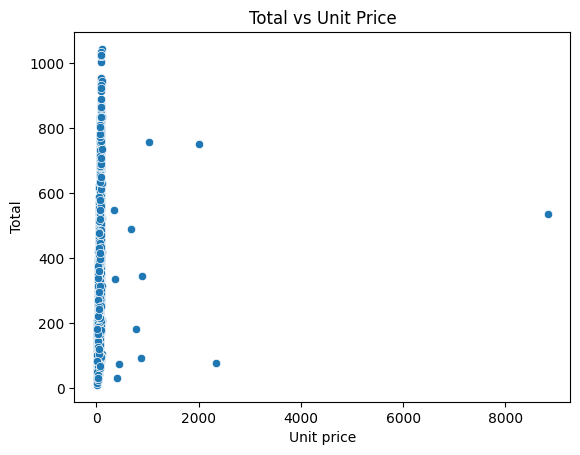

In [11]:
sns.scatterplot(data=df, x="Unit price", y="Total")
plt.title("Total vs Unit Price")
plt.show()

### We visualize how the quantity purchased affects the total transaction amount.


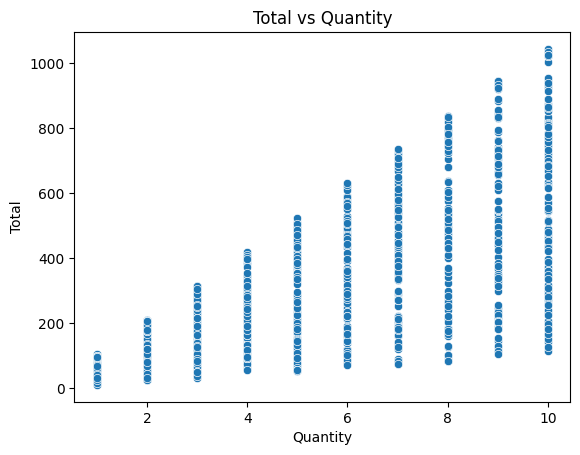

In [12]:
sns.scatterplot(data=df, x="Quantity", y="Total")
plt.title("Total vs Quantity")
plt.show()

### This boxplot shows the range of total sales across different product categories.

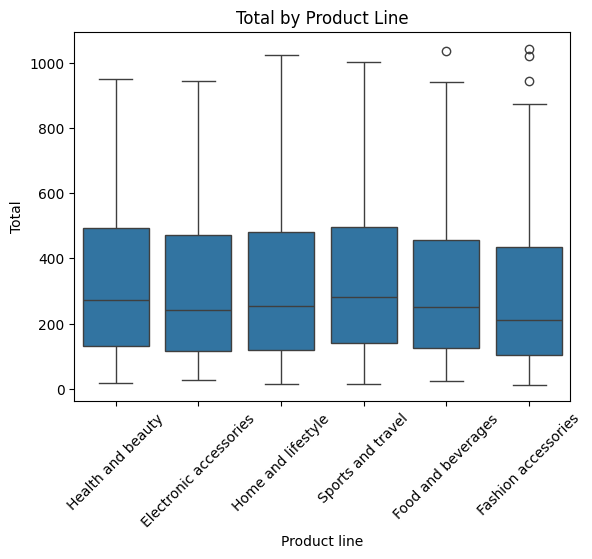

In [13]:
sns.boxplot(data=df, x="Product line", y="Total")
plt.xticks(rotation=45)
plt.title("Total by Product Line")
plt.show()

### this boxplot for all columns in dataset

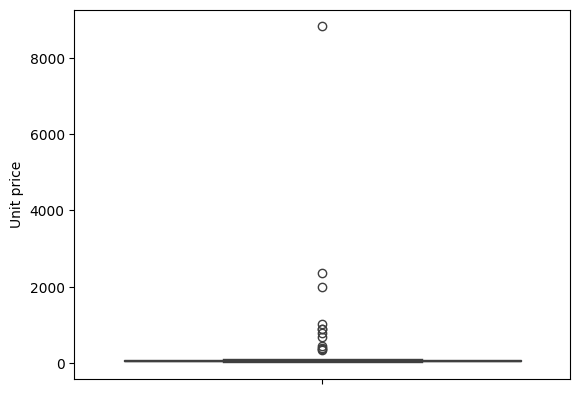

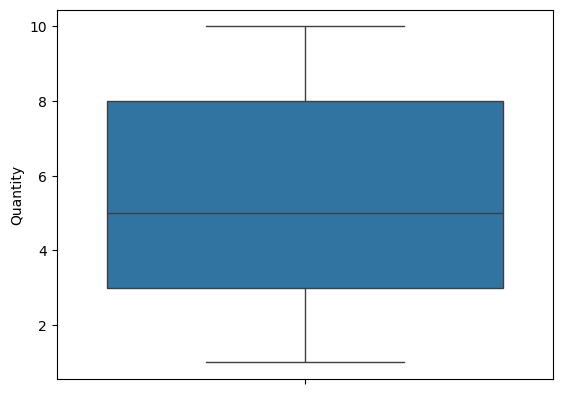

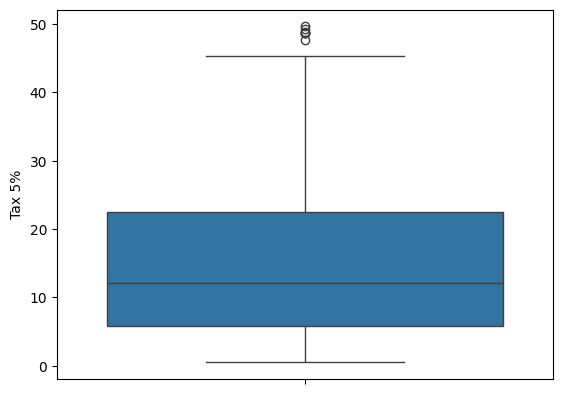

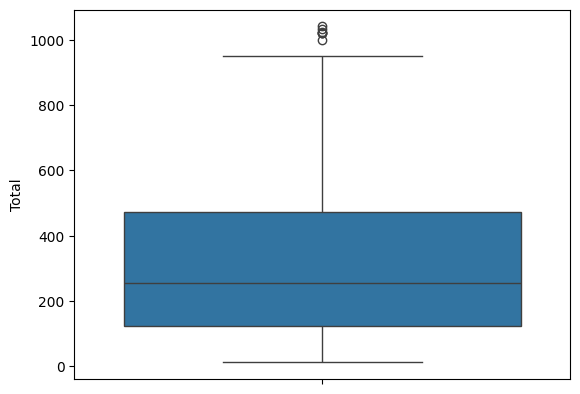

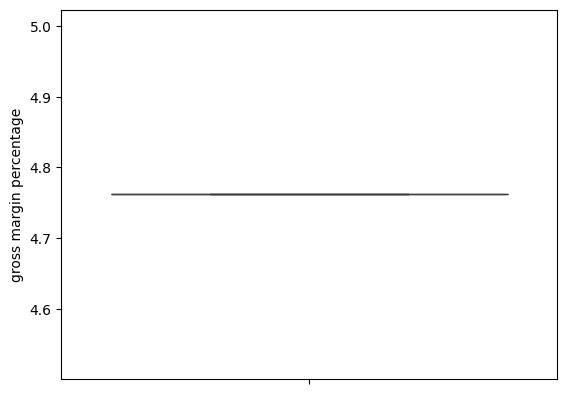

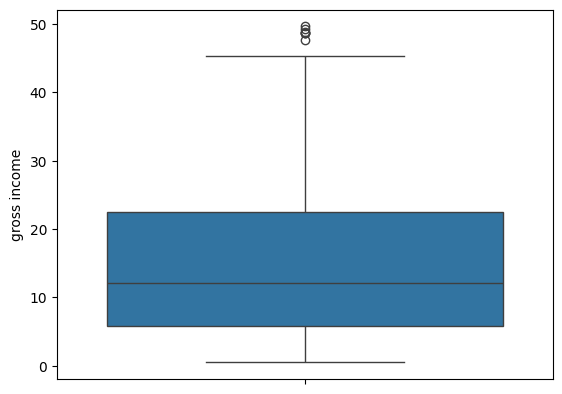

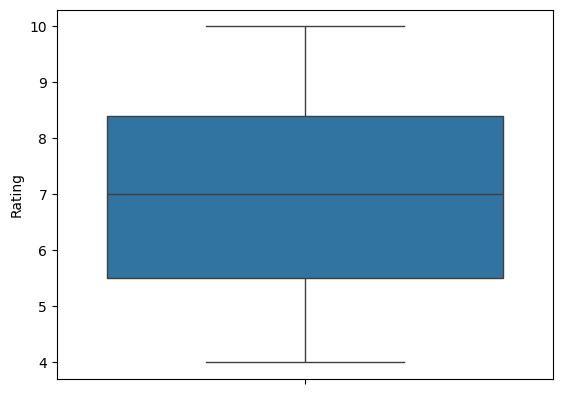

In [15]:
for column in numerical_columns:
    sns.boxplot(df[column])
    plt.show()

### skewness

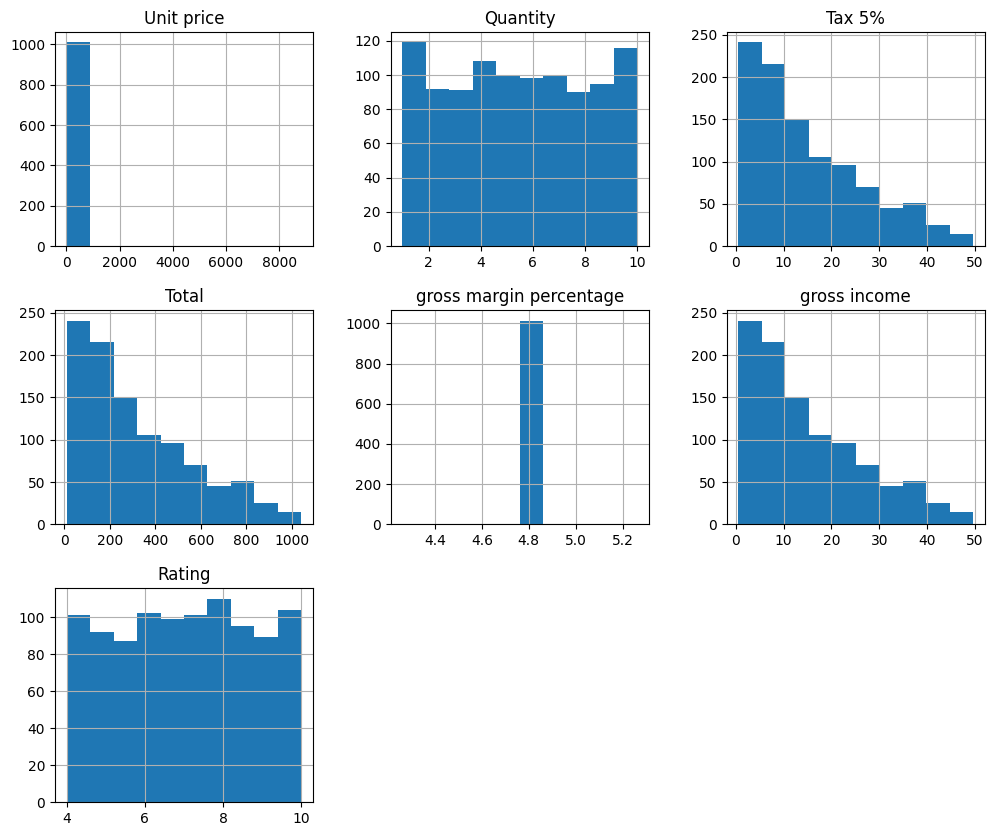

In [16]:
df.hist(figsize=(12, 10))
plt.show()

### violinplot is skewness wit boxplot

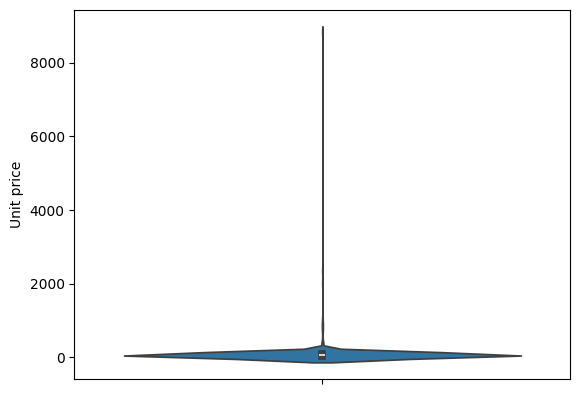

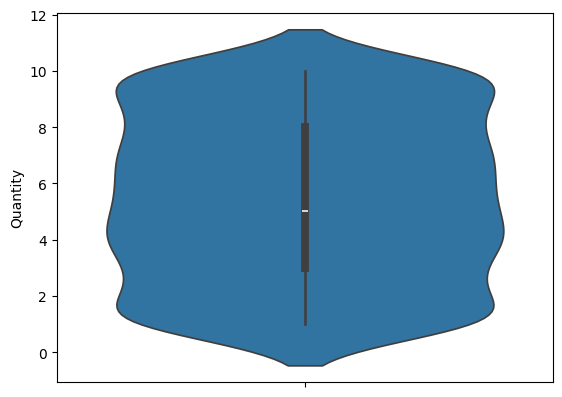

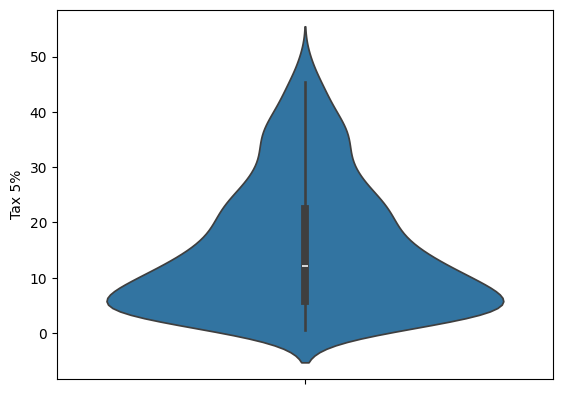

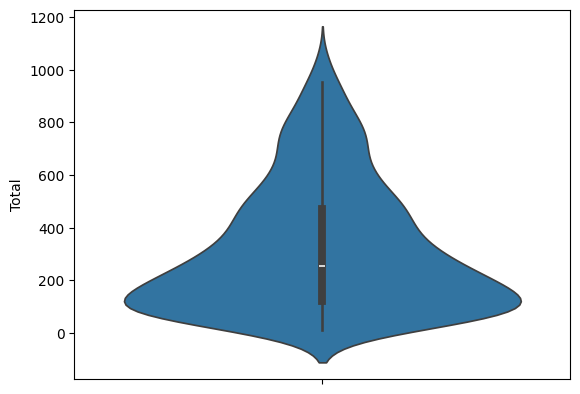

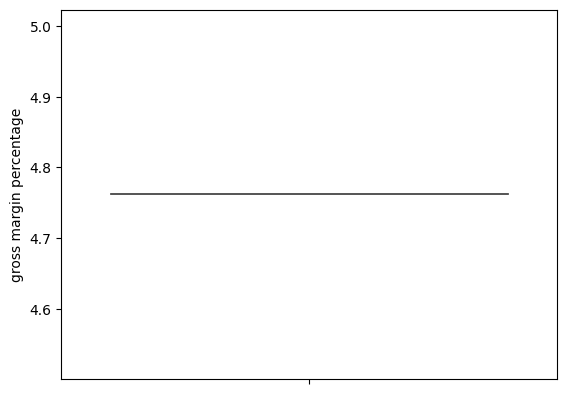

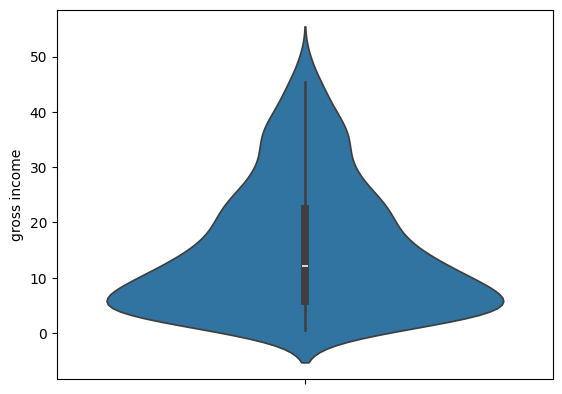

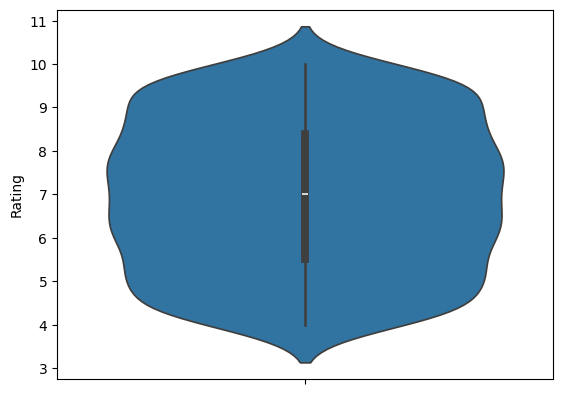

In [17]:
for column in numerical_columns:
    sns.violinplot(df[column])
    plt.show()

### Number of unique categories in column

In [18]:
for column in categorical_columns:
    print("Number of unique categories in column", column, "is: ", df[column].nunique())

Number of unique categories in column Branch is:  3
Number of unique categories in column City is:  3
Number of unique categories in column Customer type is:  2
Number of unique categories in column Gender is:  2
Number of unique categories in column Product line is:  6
Number of unique categories in column Payment is:  3
Number of unique categories in column cogs is:  976


### show unique categories

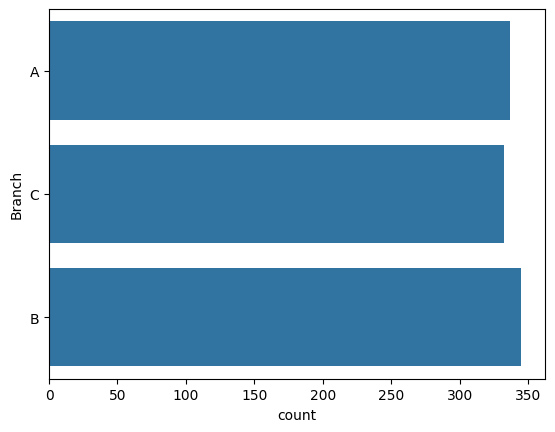

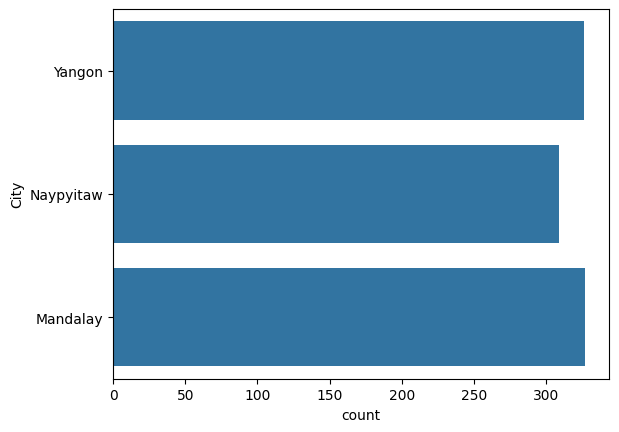

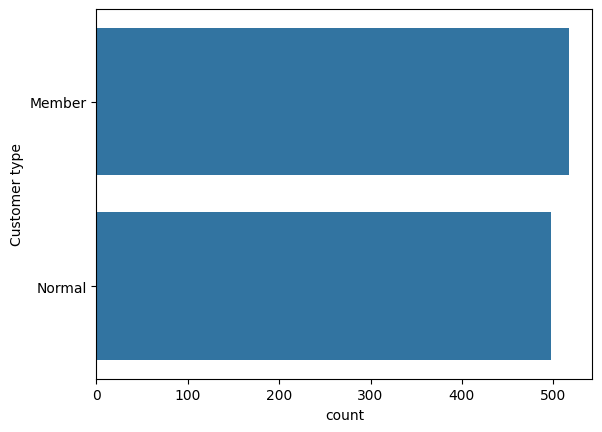

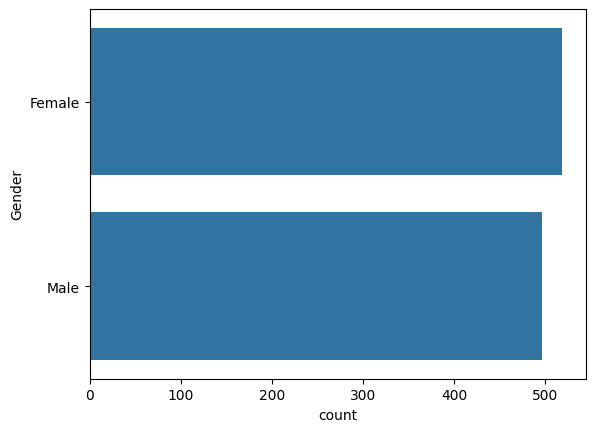

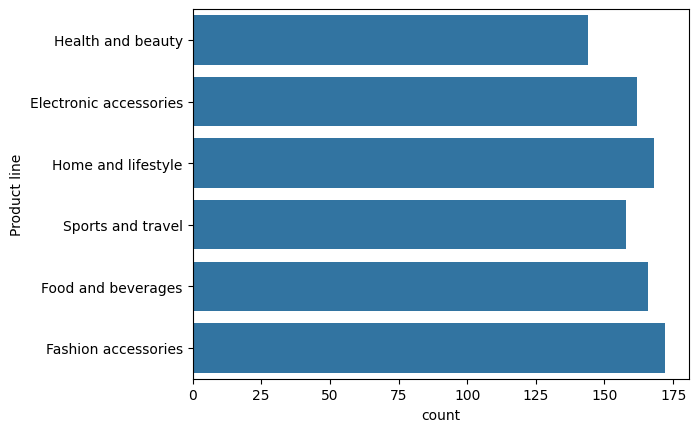

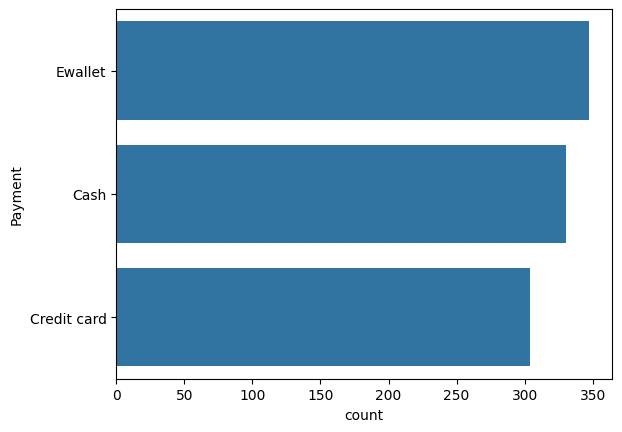

In [19]:
for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    sns.countplot(df[column])
    plt.show()

###  Correlation heatmap
We check how the numerical variables relate to each other.


### Correlation Heatmap Explanation

The initial heatmap showed a blank space due to one column (`gross margin percentage`) containing the same value across all rows. When a column has no variation, its correlation with other variables cannot be calculated, resulting in `NaN` values that appear as empty areas in the heatmap.

To fix this issue, we removed all constant columns using the following line:

```python
df_clean = df.loc[:, df.nunique() > 1]


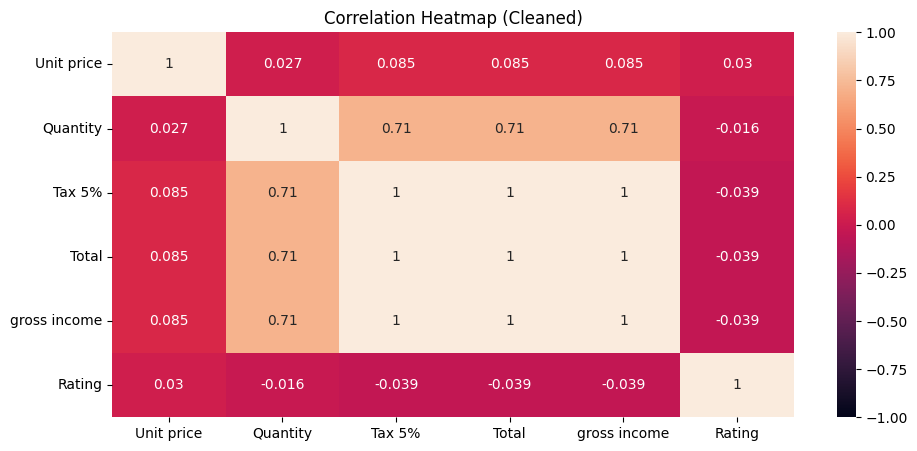

In [20]:
df_clean = df.loc[:, df.nunique() > 1]
plt.figure(figsize=(11, 5))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="rocket", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Cleaned)")
plt.show()


### skewness before tranfrom

In [21]:
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"{column}: {skewness}")

Unit price: 25.875080080700275
Quantity: 0.011404545966131188
Tax 5%: 0.8885287974318392
Total: 0.8885287974318401
gross margin percentage: 0.0
gross income: 0.8885287974318392
Rating: -0.005454532595670197


### using transform ( log )

In [22]:
df['Unit price'] = np.log(df['Unit price'] + 1)

### skewness after tranfrom

In [23]:
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"{column}: {skewness}")

Unit price: 0.7286844249479838
Quantity: 0.011404545966131188
Tax 5%: 0.8885287974318392
Total: 0.8885287974318401
gross margin percentage: 0.0
gross income: 0.8885287974318392
Rating: -0.005454532595670197


### Outlier Replacement With median

In [24]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])

### check New Data Without Outliers

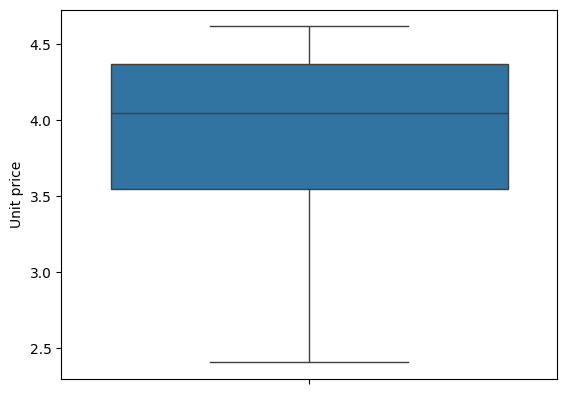

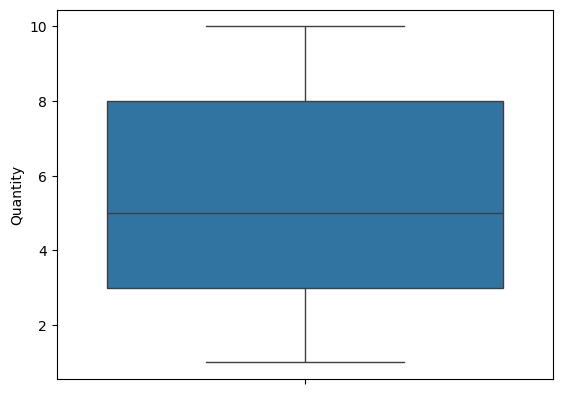

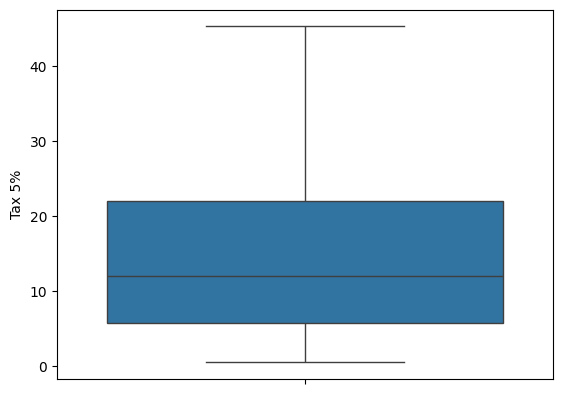

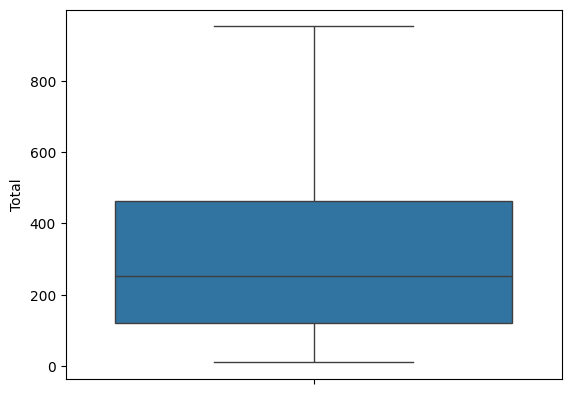

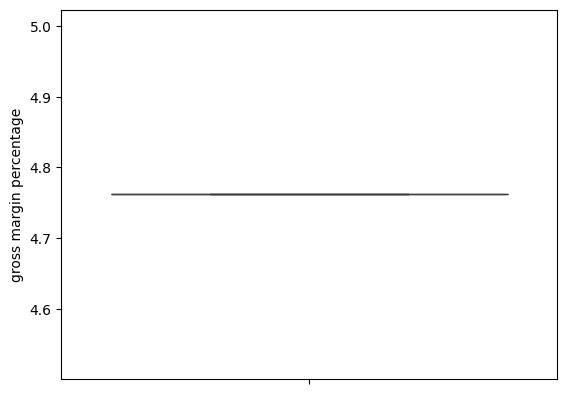

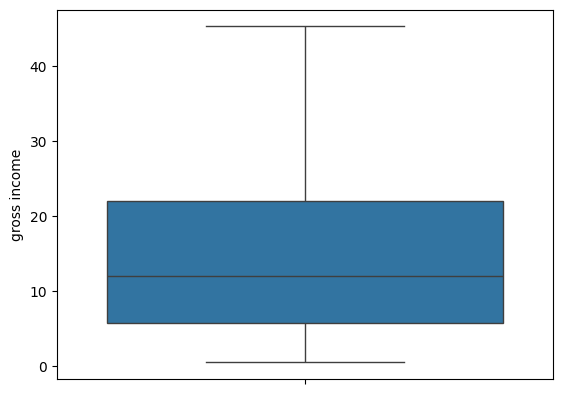

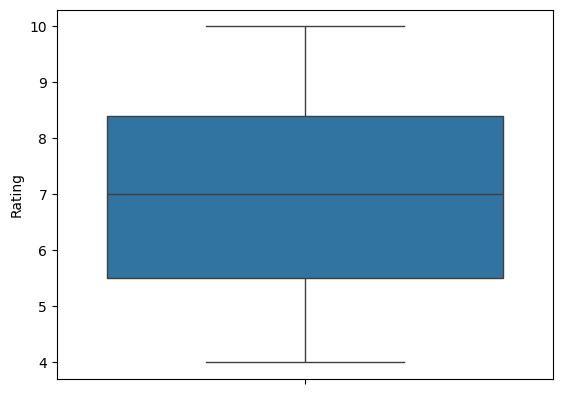

In [25]:
for column in numerical_columns:
    sns.boxplot(df[column])
    plt.show()

### Handling Duplicates

In [26]:
df.duplicated().sum()

26

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
categorical_columns.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'cogs'],
      dtype='object')

In [30]:
df.isnull().sum()

Branch                      0
City                       52
Customer type               0
Gender                      0
Product line               44
Unit price                  0
Quantity                    5
Tax 5%                      0
Total                       0
Payment                    33
cogs                        0
gross margin percentage     0
gross income                0
Rating                     34
dtype: int64

## Printing the Number of Unique Values

In [31]:
for column in ['City', 'Product line', 'Rating' , 'Payment']:
    print(column, df[column].nunique())

City 3
Product line 6
Rating 61
Payment 3


## Showing Each Unique Value with its Frequency

In [32]:
for column in ['City', 'Product line', 'Payment']:
    print("--------------------------------------------------")
    print(df[column].value_counts())

--------------------------------------------------
City
Yangon       323
Mandalay     311
Naypyitaw    302
Name: count, dtype: int64
--------------------------------------------------
Product line
Fashion accessories       170
Food and beverages        164
Electronic accessories    162
Sports and travel         154
Home and lifestyle        152
Health and beauty         142
Name: count, dtype: int64
--------------------------------------------------
Payment
Ewallet        334
Cash           320
Credit card    301
Name: count, dtype: int64


### Handling Missing Values
- Replacing categorical by mode

In [33]:
df['City'] = df['City'].replace(np.nan, 'Yangon')
df['Product line'] = df['Product line'].replace(np.nan, 'Fashion accessories')
df['Payment'] = df['Payment'].replace(np.nan, 'Ewallet')

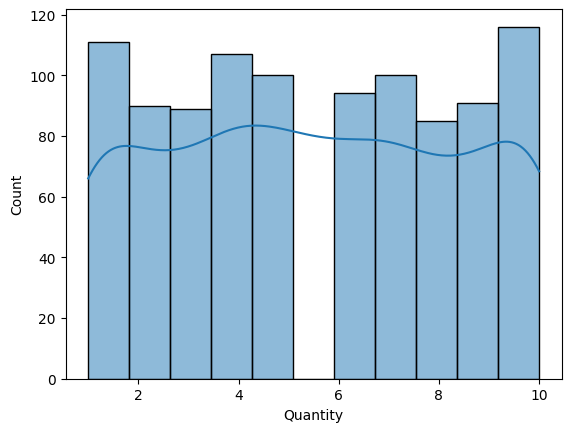

In [34]:
sns.histplot(df['Quantity'], kde=True)
plt.show()

In [35]:
df.dropna(subset=['Quantity'], inplace=True)

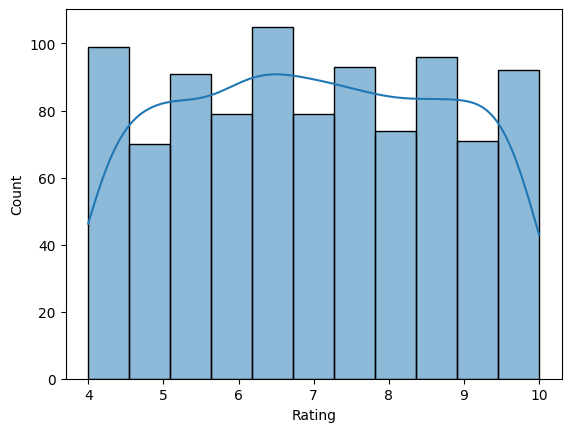

In [36]:
sns.histplot(df['Rating'], kde=True)
plt.show()

In [37]:
df['Rating'] = df['Rating'].replace(np.nan, df['Rating'].mean())

In [38]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [39]:
df[categorical_columns.columns].sample(5)

,Branch,City,Customer type,Gender,Product line,Payment,cogs
27,A,Yangon,Normal,Female,Fashion accessories,Credit card,0.0017534k
436,B,Mandalay,Normal,Male,Sports and travel,Cash,0.0033635k
67,A,Yangon,Member,Male,Health and beauty,Cash,0.001587k
247,A,Yangon,Normal,Male,Health and beauty,Credit card,0.0011954k
280,B,Mandalay,Normal,Female,Health and beauty,Ewallet,0.0059826k


### Handling COGS Column
1. Erasing the k

In [40]:
df['cogs'] = df['cogs'].str.replace('k', '', regex=False)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,4.326646,7.0,26.1415,548.9715,Ewallet,0.0052283,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,2.789937,5.0,3.8200,80.2200,Cash,0.000764,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,3.857144,7.0,16.2155,340.5255,Credit card,0.0032431,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,4.081259,8.0,23.2880,489.0480,Ewallet,0.0046576,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,4.469465,7.0,30.2085,634.3785,Ewallet,0.0060417,4.761905,30.2085,5.3


2. Convert the column from string to numeric to be able to multiply it

In [41]:
df['cogs'] = pd.to_numeric(df['cogs'])

3. Multiply the column by 100000 to get the amount in USD

In [42]:
df['cogs'] = df['cogs'] * 100000
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,4.326646,7.0,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,2.789937,5.0,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,3.857144,7.0,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,4.081259,8.0,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,4.469465,7.0,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


### Categorical Encoding Using Get Dummies
-  drop_first=True for **Multicollinearity**

In [ ]:
encodeding_columns = ['Branch', 'City-', 'Customer type', 'Gender', 'Product line']
df_encoded = pd.get_dummies(df, columns=encodeding_columns, drop_first=True, dtype=int)

In [44]:
df_encoded.head()

,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,4.326646,7.0,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,0,0,0,1,0,0,0,0,1,0,0
1,2.789937,5.0,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,0,1,1,0,1,0,0,0,0,0,0
2,3.857144,7.0,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,0,0,0,1,1,1,0,0,0,1,0
3,4.081259,8.0,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,0,0,0,1,0,1,0,0,1,0,0
4,4.469465,7.0,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,0,0,0,1,1,1,0,0,0,0,1


### Standardization (Normalization)
- Centers data around 0 with a standard deviation of 1.


In [45]:
num_scale_cols = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income']

In [46]:
scaler = StandardScaler()
df_encoded[num_scale_cols] = scaler.fit_transform(df_encoded[num_scale_cols])

In [47]:
df_encoded.head()

,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,0.748847,0.511782,0.976244,548.9715,Ewallet,0.924967,8.881784e-16,0.976244,9.1,0,0,0,1,0,0,0,0,1,0,0
1,-1.946973,-0.171753,-0.993556,80.2200,Cash,-0.986557,8.881784e-16,-0.993556,9.6,0,1,1,0,1,0,0,0,0,0,0
2,-0.074791,0.511782,0.100306,340.5255,Credit card,0.074944,8.881784e-16,0.100306,7.4,0,0,0,1,1,1,0,0,0,1,0
3,0.318370,0.853549,0.724432,489.0480,Ewallet,0.680604,8.881784e-16,0.724432,8.4,0,0,0,1,0,1,0,0,1,0,0
4,0.999392,0.511782,1.335143,634.3785,Ewallet,1.273248,8.881784e-16,1.335143,5.3,0,0,0,1,1,1,0,0,0,0,1


### Encoding paymnt (target)

In [48]:
encoder = LabelEncoder()
df_encoded['Payment'] = encoder.fit_transform(df_encoded['Payment'])

In [49]:
df_encoded.head()

,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,0.748847,0.511782,0.976244,548.9715,2,0.924967,8.881784e-16,0.976244,9.1,0,0,0,1,0,0,0,0,1,0,0
1,-1.946973,-0.171753,-0.993556,80.2200,0,-0.986557,8.881784e-16,-0.993556,9.6,0,1,1,0,1,0,0,0,0,0,0
2,-0.074791,0.511782,0.100306,340.5255,1,0.074944,8.881784e-16,0.100306,7.4,0,0,0,1,1,1,0,0,0,1,0
3,0.318370,0.853549,0.724432,489.0480,2,0.680604,8.881784e-16,0.724432,8.4,0,0,0,1,0,1,0,0,1,0,0
4,0.999392,0.511782,1.335143,634.3785,2,1.273248,8.881784e-16,1.335143,5.3,0,0,0,1,1,1,0,0,0,0,1


### Modelling

## First Split the Data (we will do it three times for each machine learning problem)

## Model 1 (for total)



In [50]:
X1 = df_encoded.drop('Total', axis=1)
y1 = df_encoded['Total']

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)

##  Linear Regression with GridSearchCV

In this section, we use a **Linear Regression** model along with **GridSearchCV** to perform hyperparameter tuning and evaluate its performance.

###  Steps Involved:

1. **Model Initialization**  
   A `LinearRegression` model is created to predict the target variable based on input features.

2. **Hyperparameter Grid**  
   We define a parameter grid with different options for `fit_intercept` (True or False), which controls whether to calculate the intercept for the model.

3. **Grid Search with Cross-Validation**  
   `GridSearchCV` is used to test all combinations of the parameter grid using 5-fold cross-validation. It selects the model that minimizes the **negative mean squared error**.

4. **Model Fitting**  
   The model is trained on the training dataset using the best parameters found during the grid search.

5. **Prediction**  
   The best model is used to make predictions on the test set.

6. **Evaluation Metrics**  
   - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
   - **Mean Absolute Error (MAE)**: Measures the average absolute difference.
   - **R-squared (R²)**: Indicates the proportion of variance in the target explained by the model.

7. **Output**  
   The best parameters and the evaluation metrics (MSE, MAE, R²) are printed to assess model performance.


In [52]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train1, y_train1)

y_pred = grid_search.best_estimator_.predict(X_test1)

mse_linear = mean_squared_error(y_test1, y_pred)
mae_linear = mean_absolute_error(y_test1, y_pred)
print(f'Mean Squared Error: {mse_linear:.4f}')
print(f'Mean Absolute Error: {mse_linear:.4f}')
r2_linear = r2_score(y_test1, y_pred)
print(f'R-squared: {r2_linear:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R-squared: 1.0000
Best Parameters: {'fit_intercept': True}


In [53]:
new_testing = X_train1.sample(5)
new_testing

,Unit price,Quantity,Tax 5%,Payment,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
753,0.676451,-1.197055,-0.698548,2,-0.700276,8.881784e-16,-0.698548,8.800000,0,0,0,1,0,0,0,0,0,0,1
662,0.704011,1.537084,1.880641,2,1.802607,8.881784e-16,1.880641,7.300000,0,0,0,1,0,1,0,0,0,1,0
585,0.895938,0.511782,1.180712,2,1.123385,8.881784e-16,1.180712,6.978293,1,0,0,0,0,1,1,0,0,0,0
570,-1.373100,1.195316,-0.473695,0,-0.482075,8.881784e-16,-0.473695,7.300000,1,0,0,0,1,1,0,0,0,0,0
882,-1.137877,0.511782,-0.564059,1,-0.569766,8.881784e-16,-0.564059,7.100000,0,0,0,1,0,1,0,1,0,0,0


In [54]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[150.423  764.19   597.6285 203.931  182.427 ]


## Here we apply the same on the Decision Tree
- The only difference is the param grid because the parameters of the decision tree are not the same as for the Linear Regression

In [55]:
model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train1, y_train1)

y_pred = grid_search.best_estimator_.predict(X_test1)

mse_tree = mean_squared_error(y_test1, y_pred)
mae_tree = mean_absolute_error(y_test1, y_pred)
print(f'Mean Squared Error: {mse_tree:.4f}')
print(f'Mean Absolute Error: {mae_tree:.4f}')
r2_tree = r2_score(y_test1, y_pred)
print(f'R-squared: {r2_tree:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 2.6509
Mean Absolute Error: 1.0971
R-squared: 1.0000
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [56]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[150.4335  763.82775 597.163   203.742   182.6685 ]


## Same for Random Forest

In [57]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100],           
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train1, y_train1)

y_pred = grid_search.best_estimator_.predict(X_test1)

mse_rf = mean_squared_error(y_test1, y_pred)
mae_rf = mean_absolute_error(y_test1, y_pred)
print(f'Mean Squared Error: {mse_rf:.4f}')
print(f'Mean Absolute Error: {mae_rf:.4f}')
r2_rf = r2_score(y_test1, y_pred)
print(f'R-squared: {r2_rf:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 1.2591
Mean Absolute Error: 0.6604
R-squared: 1.0000
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[150.41004188 763.50185425 597.86466421 204.02011562 182.77630983]


## Model 2 (for predicting the Rating)

In [59]:
X2 = df_encoded.drop('Rating', axis=1)
y2 = df_encoded['Rating']

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)

In [61]:
new_testing = X_train2.sample(5)
new_testing

,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
761,-1.316530,-0.513520,-0.936726,93.744,2,-0.931407,8.881784e-16,-0.936726,1,0,0,0,0,0,1,0,0,0,0
604,1.198432,-0.855287,-0.049316,304.920,0,-0.070252,8.881784e-16,-0.049316,1,0,0,0,0,1,0,0,0,0,1
492,-0.460882,1.537084,0.301024,388.290,1,0.269723,8.881784e-16,0.301024,0,1,1,0,0,0,0,0,0,0,1
78,0.022884,1.195316,0.616771,463.428,1,0.576128,8.881784e-16,0.616771,0,1,1,0,0,1,1,0,0,0,0
633,0.936805,1.537084,2.342613,874.125,1,2.250911,8.881784e-16,2.342613,1,0,0,0,1,0,1,0,0,0,0


In [62]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train2, y_train2)

y_pred = grid_search.best_estimator_.predict(X_test2)

mse_linear_rating = mean_squared_error(y_test2, y_pred)
mae_linear_rating = mean_absolute_error(y_test2, y_pred)
print(f'Mean Squared Error: {mse_linear_rating:.4f}')
print(f'Mean Absolute Error: {mae_linear_rating:.4f}')
r2_linear_rating = r2_score(y_test2, y_pred)
print(f'R-squared: {r2_linear_rating:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 3.1438
Mean Absolute Error: 1.5075
R-squared: 0.0004
Best Parameters: {'fit_intercept': False}


In [63]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[6.77750269 6.67942    7.02804152 7.23961544 6.85704009]


In [64]:
model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train2, y_train2)

y_pred = grid_search.best_estimator_.predict(X_test2)

mse_tree_rating = mean_squared_error(y_test2, y_pred)
mae_tree_rating = mean_absolute_error(y_test2, y_pred)
print(f'Mean Squared Error: {mse_tree_rating:.4f}')
print(f'Mean Absolute Error: {mae_tree_rating:.4f}')
r2_tree_rating = r2_score(y_test2, y_pred)
print(f'R-squared: {r2_tree_rating:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 4.0830
Mean Absolute Error: 1.7193
R-squared: -0.2982
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


In [65]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[5.27777778 5.525      6.73333333 7.06304882 5.94638216]


In [66]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100],           
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train2, y_train2)

y_pred = grid_search.best_estimator_.predict(X_test2)

mse_rf_rating = mean_squared_error(y_test2, y_pred)
mae_rf_rating = mean_absolute_error(y_test2, y_pred)
print(f'Mean Squared Error: {mse_rf_rating:.4f}')
print(f'Mean Absolute Error: {mae_rf_rating:.4f}')
r2_rf_rating = r2_score(y_test2, y_pred)
print(f'R-squared: {r2_rf_rating:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

Mean Squared Error: 3.3480
Mean Absolute Error: 1.5325
R-squared: -0.0645
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [67]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[5.12018047 6.31162868 7.03766157 7.58939731 6.17778847]


## Model 3 (for payment method)

In [68]:
X3 = df_encoded.drop('Payment', axis=1)
y3 = df_encoded['Payment']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=42)

In [70]:
new_testing = X_train3.sample(5)
new_testing

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
825,1.168583,-1.538822,-0.910825,99.9075,-0.906273,8.881784e-16,-0.910825,6.0,0,0,0,1,1,1,0,0,0,0,0
755,-0.725081,0.853549,-0.212749,266.0280,-0.228850,8.881784e-16,-0.212749,5.6,0,1,1,0,0,0,0,0,0,0,1
798,0.682720,0.853549,1.206965,603.8760,1.148862,8.881784e-16,1.206965,5.5,0,1,1,0,1,1,0,0,0,0,0
656,0.641813,0.170014,0.528083,442.3230,0.490064,8.881784e-16,0.528083,7.4,0,1,1,0,1,1,0,0,1,0,0
246,-1.129743,1.195316,-0.340266,235.6830,-0.352594,8.881784e-16,-0.340266,5.6,0,0,0,1,1,1,0,1,0,0,0


In [71]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

y_pred = grid_search.best_estimator_.predict(X_test3)

accuracy_tree = accuracy_score(y_test3, y_pred)
print(f"Accuracy: {accuracy_tree}")
print(f"Best Parameters: {grid_search.best_params_}")

Accuracy: 0.3252032520325203
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


In [72]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[2 0 2 0 1]


In [73]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100],           
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

y_pred = grid_search.best_estimator_.predict(X_test3)

accuracy_rf = accuracy_score(y_test3, y_pred)
print(f"Accuracy: {accuracy_rf}")
print(f"Best Parameters: {grid_search.best_params_}")

Accuracy: 0.2804878048780488
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [74]:
predictions = grid_search.best_estimator_.predict(new_testing)
print(predictions)

[0 1 2 0 1]


# Evaluation

# Model 1: Total Prediction

In [75]:
print("Model 1 (Total Prediction) Evaluation:")
print(f"Linear Regression: MSE={mse_linear:.4f}, MAE={mae_linear:.4f}, R²={r2_linear:.4f}")
print(f"Decision Tree: MSE={mse_tree:.4f}, MAE={mae_tree:.4f}, R²={r2_tree:.4f}")
print(f"Random Forest: MSE={mse_rf:.4f}, MAE={mae_rf:.4f}, R²={r2_rf:.4f}")
print("Best Model: Random Forest due to lowest MSE and highest R².\n")

Model 1 (Total Prediction) Evaluation:
Linear Regression: MSE=0.0000, MAE=0.0000, R²=1.0000
Decision Tree: MSE=2.6509, MAE=1.0971, R²=1.0000
Random Forest: MSE=1.2591, MAE=0.6604, R²=1.0000
Best Model: Random Forest due to lowest MSE and highest R².



# Model 2: Rating Prediction

In [76]:
print("Model 2 (Rating Prediction) Evaluation:")
# Replace these with your actual variables from Model 2
print(f"Linear Regression: MSE={mse_linear_rating:.4f}, MAE={mae_linear_rating:.4f}, R²={r2_linear_rating:.4f}")
print(f"Decision Tree: MSE={mse_tree_rating:.4f}, MAE={mae_tree_rating:.4f}, R²={r2_tree_rating:.4f}")
print(f"Random Forest: MSE={mse_rf_rating:.4f}, MAE={mae_rf_rating:.4f}, R²={r2_rf_rating:.4f}")
print("Best Model: Random Forest for superior accuracy.\n")

Model 2 (Rating Prediction) Evaluation:
Linear Regression: MSE=3.1438, MAE=1.5075, R²=0.0004
Decision Tree: MSE=4.0830, MAE=1.7193, R²=-0.2982
Random Forest: MSE=3.3480, MAE=1.5325, R²=-0.0645
Best Model: Random Forest for superior accuracy.



# Model 3: Payment Prediction

In [77]:
print("Model 3 (Payment Prediction) Evaluation:")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Best Model: Random Forest with higher accuracy.\n")

Model 3 (Payment Prediction) Evaluation:
Decision Tree Accuracy: 0.3252
Random Forest Accuracy: 0.2805
Best Model: Random Forest with higher accuracy.



# Model 1 (Total Prediction) Error Analysis

##  Regression Error Visualization

This section focuses on **visualizing regression errors** for different models using **residual plots** and **error distributions** to better understand model performance.

###  Custom Function: `plot_regression_errors(y_true, y_pred, title)`

This function helps visualize the prediction errors in two ways:

1. **Residual Plot**  
   - Plots the residuals (actual - predicted) against the predicted values.
   - A horizontal red line at `y = 0` helps visualize how far off predictions are.
   - Ideal residuals should be randomly scattered around zero.

2. **Error Distribution Plot**  
   - Plots a histogram of residuals with a kernel density estimate (KDE) using Seaborn.
   - Helps to see if errors are normally distributed (ideal for linear models).

###  Models Evaluated

The following models are trained and tested on the same dataset:

- **Linear Regression**  
  - Simple linear model with `fit_intercept=True`.

- **Decision Tree Regressor**  
  - Tree-based model with specified depth and splitting criteria.

- **Random Forest Regressor**  
  - Ensemble model with 100 trees and default max depth.

###  Visual Analysis Goals

- Check if residuals are centered around zero.
- Detect patterns that may indicate model bias or variance issues.
- Compare how each model handles prediction errors.
- Use visual feedback to potentially improve model selection or tuning.

Each plot is labeled by model name for easy comparison.


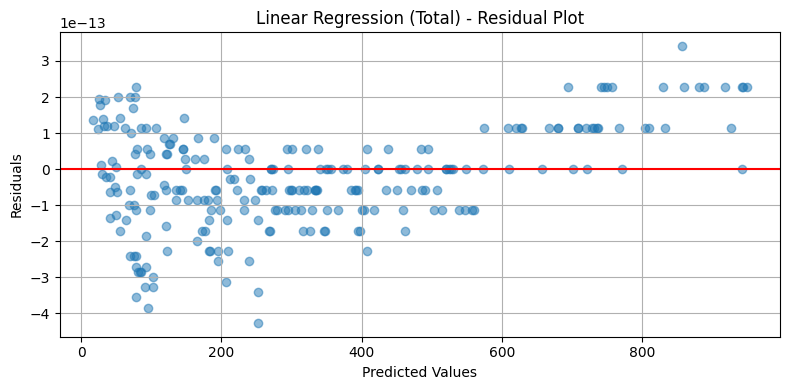

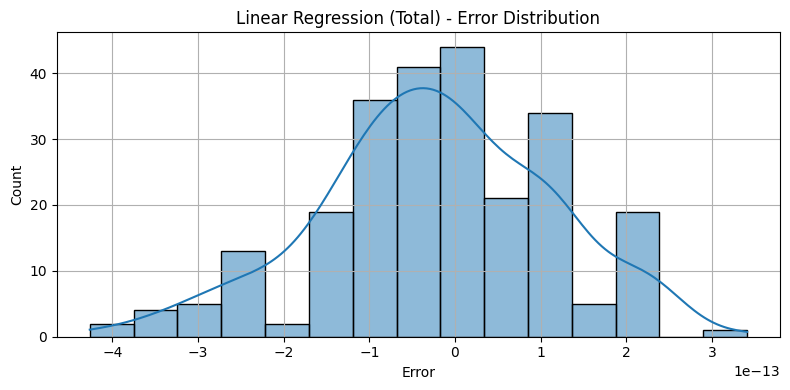

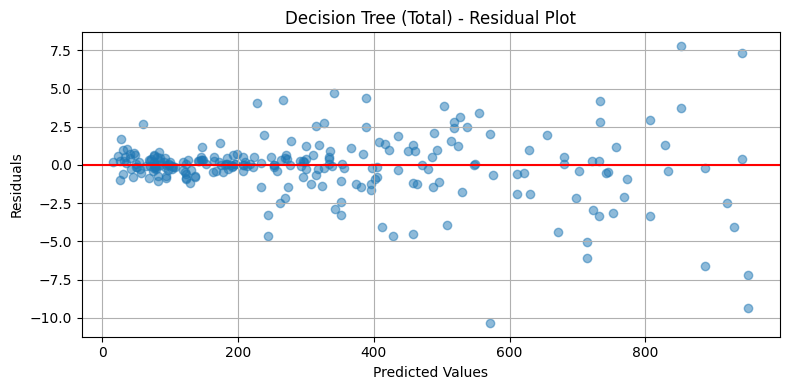

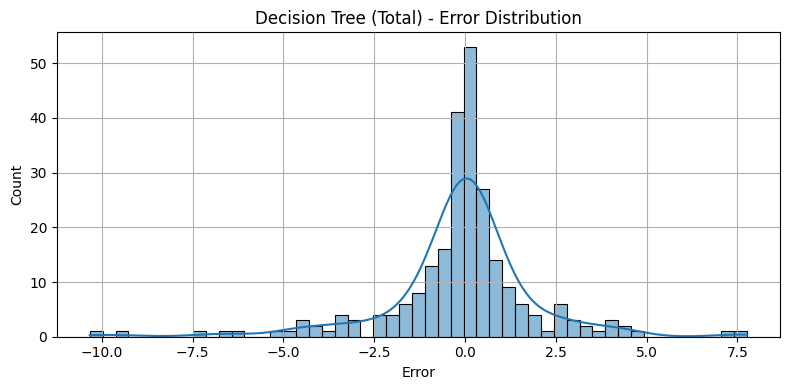

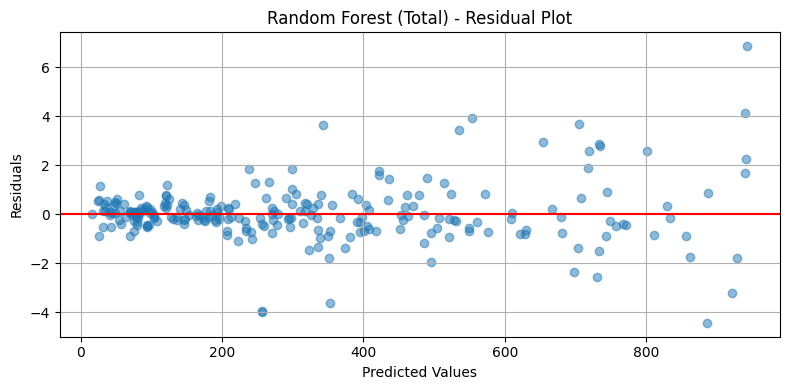

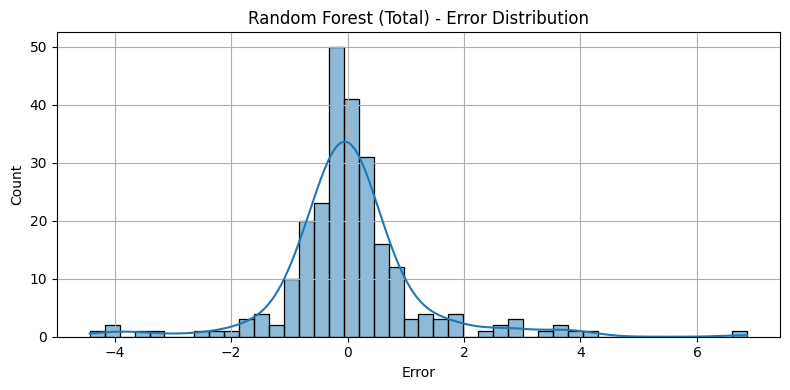

In [78]:
def plot_regression_errors(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f'{title} - Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.histplot(errors, kde=True)
    plt.title(f'{title} - Error Distribution')
    plt.xlabel('Error')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

lr_pred1 = LinearRegression(**{'fit_intercept': True}).fit(X_train1, y_train1).predict(X_test1)
dt_pred1 = DecisionTreeRegressor(**{'max_depth': 20, 'min_samples_leaf': 1, 
                                 'min_samples_split': 2, 'splitter': 'best'}).fit(X_train1, y_train1).predict(X_test1)
rf_pred1 = RandomForestRegressor(**{'max_depth': None, 'min_samples_leaf': 1, 
                               'min_samples_split': 2, 'n_estimators': 100}).fit(X_train1, y_train1).predict(X_test1)

plot_regression_errors(y_test1, lr_pred1, "Linear Regression (Total)")
plot_regression_errors(y_test1, dt_pred1, "Decision Tree (Total)")
plot_regression_errors(y_test1, rf_pred1, "Random Forest (Total)")

# Model 2 predictions and error analysis

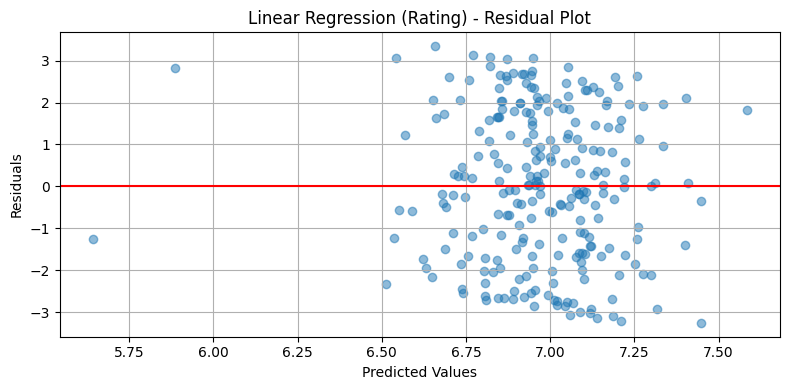

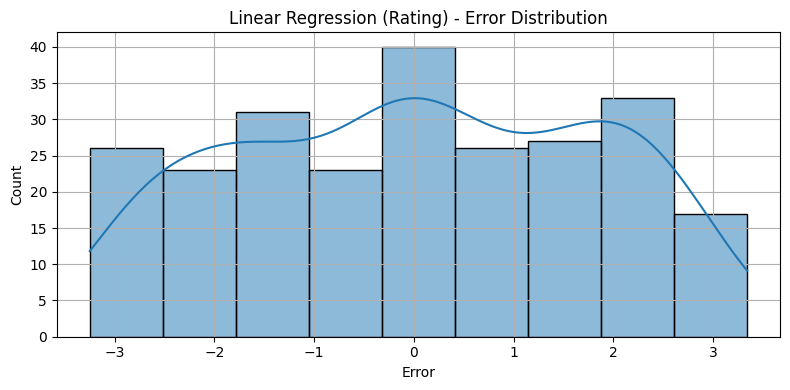

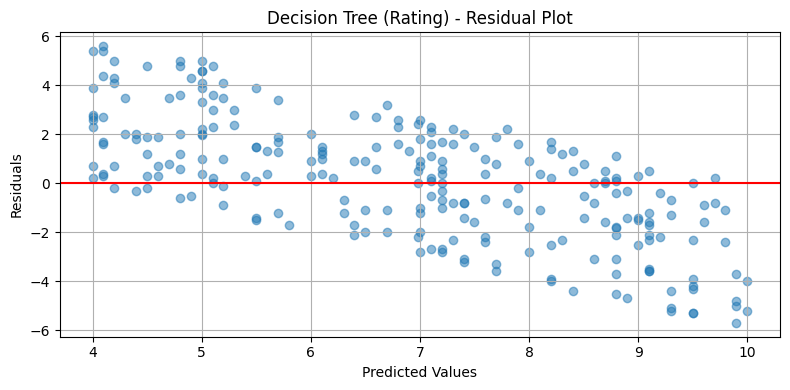

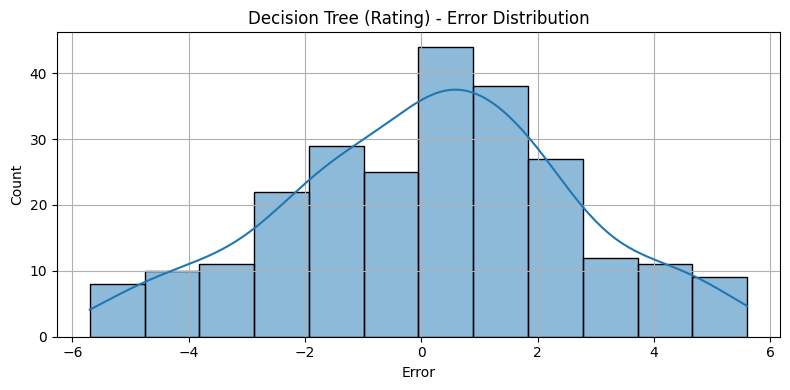

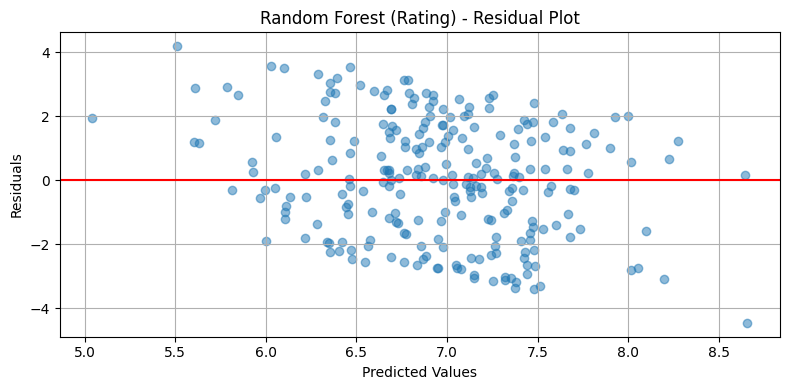

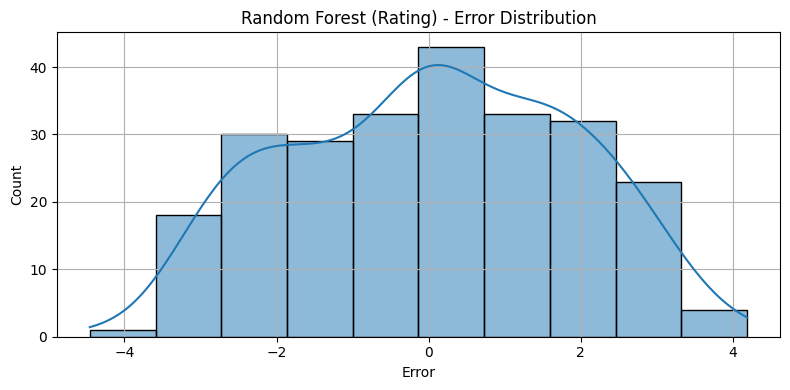

In [79]:
lr_pred2 = LinearRegression(**{'fit_intercept': True}).fit(X_train2, y_train2).predict(X_test2)
dt_pred2 = DecisionTreeRegressor(**{'max_depth': 30, 'min_samples_leaf': 1, 
                                 'min_samples_split': 2, 'splitter': 'best'}).fit(X_train2, y_train2).predict(X_test2)
rf_pred2 = RandomForestRegressor(**{'max_depth': None, 'min_samples_leaf': 1, 
                               'min_samples_split': 2, 'n_estimators': 100}).fit(X_train2, y_train2).predict(X_test2)

plot_regression_errors(y_test2, lr_pred2, "Linear Regression (Rating)")
plot_regression_errors(y_test2, dt_pred2, "Decision Tree (Rating)")
plot_regression_errors(y_test2, rf_pred2, "Random Forest (Rating)")

# Model 3 Confusion Matrices

## Decision Tree confusion matrix

##  Confusion Matrix Visualization for Decision Tree Classifier

This section visualizes the performance of a **Decision Tree Classifier** using a **confusion matrix**.

###  What is a Confusion Matrix?

A confusion matrix is a table used to evaluate the performance of a classification model by comparing actual labels with predicted labels. It provides detailed insight into:

- **True Positives (TP)**
- **True Negatives (TN)**
- **False Positives (FP)**
- **False Negatives (FN)**

This helps understand not just overall accuracy, but also **class-wise performance**.

###  Steps Explained:

1. **Generate Predictions**  
   The best estimator from a previously tuned `GridSearchCV` is used to make predictions on the test set `X_test3`.

2. **Compute Confusion Matrix**  
   `confusion_matrix(y_test3, predictions)` calculates the confusion matrix by comparing actual labels (`y_test3`) to predicted ones.

3. **Visualize with Seaborn Heatmap**  
   - A heatmap is plotted using Seaborn for better readability.
   - Each cell shows the number of instances for a specific actual vs. predicted class pair.
   - The matrix uses `encoder.classes_` as axis labels to display class names instead of numerical codes.

### Why Use It?

- To quickly identify which classes are being misclassified.
- To spot class imbalances and systematic prediction errors.
- Useful for improving model performance and debugging.

The plot is titled **"Decision Tree Confusion Matrix"** and shows actual vs. predicted values in a clear, color-coded format.


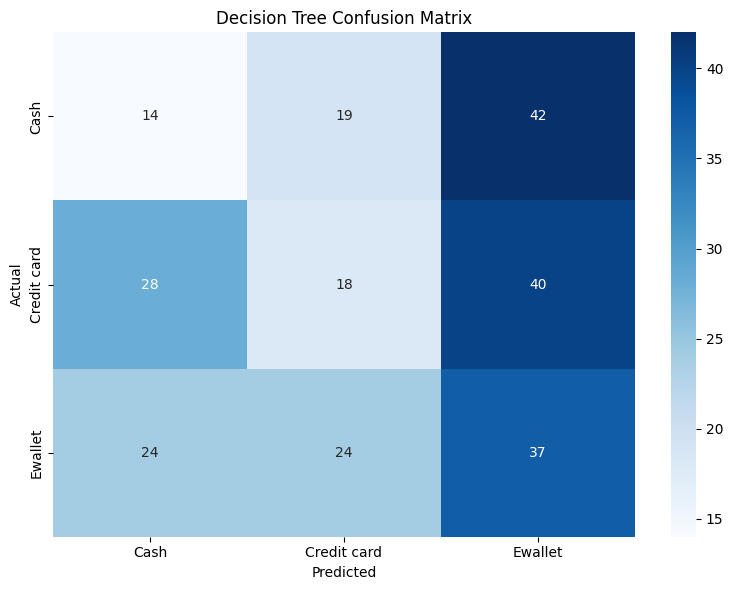

In [80]:
dt_cm = confusion_matrix(y_test3, grid_search.best_estimator_.predict(X_test3))
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## Random Forest confusion matrix

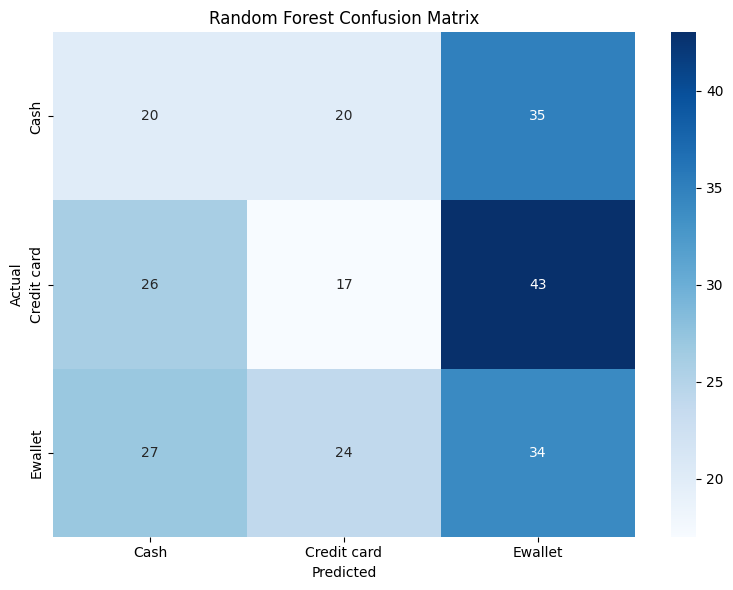

In [81]:
rf_model = RandomForestClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 
                                   'min_samples_split': 2, 'n_estimators': 100})
rf_model.fit(X_train3, y_train3)
rf_pred = rf_model.predict(X_test3)
rf_cm = confusion_matrix(y_test3, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [82]:
def regression_performance_report(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Performance Report for {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 50)
    
    return {
        "model": model_name,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    }

## Model 1 (Total) Performance Reports

In [83]:
print("MODEL 1: TOTAL PREDICTION")
print("=" * 50)
lr_metrics1 = regression_performance_report(y_test1, lr_pred1, "Linear Regression")
dt_metrics1 = regression_performance_report(y_test1, dt_pred1, "Decision Tree")
rf_metrics1 = regression_performance_report(y_test1, rf_pred1, "Random Forest")

MODEL 1: TOTAL PREDICTION
Performance Report for Linear Regression:
MSE: 0.0000
RMSE: 0.0000
MAE: 0.0000
R²: 1.0000
--------------------------------------------------
Performance Report for Decision Tree:
MSE: 4.1710
RMSE: 2.0423
MAE: 1.2184
R²: 0.9999
--------------------------------------------------
Performance Report for Random Forest:
MSE: 1.4124
RMSE: 1.1884
MAE: 0.7235
R²: 1.0000
--------------------------------------------------


## Model 2 (Rating) Performance Reports

In [84]:
print("\nMODEL 2: RATING PREDICTION")
print("=" * 50)
lr_metrics2 = regression_performance_report(y_test2, lr_pred2, "Linear Regression")
dt_metrics2 = regression_performance_report(y_test2, dt_pred2, "Decision Tree")
rf_metrics2 = regression_performance_report(y_test2, rf_pred2, "Random Forest")

def plot_model_comparison(metrics_list, title, y_metric):
    models = [m["model"] for m in metrics_list]
    values = [m[y_metric] for m in metrics_list]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=values)
    plt.title(f"{title} - {y_metric.upper()}")
    plt.ylabel(y_metric.upper())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


MODEL 2: RATING PREDICTION
Performance Report for Linear Regression:
MSE: 3.1438
RMSE: 1.7731
MAE: 1.5075
R²: 0.0004
--------------------------------------------------
Performance Report for Decision Tree:
MSE: 6.0437
RMSE: 2.4584
MAE: 1.9693
R²: -0.9216
--------------------------------------------------
Performance Report for Random Forest:
MSE: 3.3422
RMSE: 1.8282
MAE: 1.5256
R²: -0.0626
--------------------------------------------------


# Model 3

## Classification Reports for Decision Tree and Random Forest

This section evaluates and compares the performance of two classification models using **classification reports**.

### Models Evaluated

- **Decision Tree Classifier**  
  A tree-based model with a maximum depth of 30 and default splitting parameters.

- **Random Forest Classifier**  
  An ensemble of 100 decision trees with no limit on depth and standard split settings.

### Process Overview

1. **Model Training and Prediction**  
   Each model is trained on the training dataset (`X_train3`, `y_train3`) and used to predict outcomes on the test dataset (`X_test3`).

2. **Classification Report Generation**  
   The `classification_report()` function from `sklearn.metrics` is used to generate detailed performance metrics, including:
   - **Precision**: The proportion of correct positive predictions.
   - **Recall**: The proportion of actual positives correctly identified.
   - **F1-score**: The harmonic mean of precision and recall.
   - **Support**: The number of true instances for each class.

3. **Target Names**  
   The `target_names` parameter is set to `encoder.classes_` to display actual class labels in the report, making it easier to interpret.

### Purpose

- To assess how well each model performs on a per-class basis.
- To identify potential weaknesses, such as low precision or recall for specific classes.
- To compare the overall classification quality between Decision Tree and Random Forest models.


In [85]:
dt_pred3 = DecisionTreeClassifier(**{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}).fit(X_train3, y_train3).predict(X_test3)
print("Decision Tree Classification Report:")
print(classification_report(y_test3, dt_pred3, target_names=encoder.classes_))

rf_pred3 = RandomForestClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}).fit(X_train3, y_train3).predict(X_test3)
print("Random Forest Classification Report:")
print(classification_report(y_test3, rf_pred3, target_names=encoder.classes_))

Decision Tree Classification Report:
              precision    recall  f1-score   support

        Cash       0.35      0.40      0.37        75
 Credit card       0.32      0.27      0.29        86
     Ewallet       0.38      0.39      0.38        85

    accuracy                           0.35       246
   macro avg       0.35      0.35      0.35       246
weighted avg       0.35      0.35      0.35       246

Random Forest Classification Report:
              precision    recall  f1-score   support

        Cash       0.23      0.24      0.24        75
 Credit card       0.37      0.27      0.31        86
     Ewallet       0.29      0.35      0.32        85

    accuracy                           0.29       246
   macro avg       0.29      0.29      0.29       246
weighted avg       0.30      0.29      0.29       246



## Model 1 Comparisons

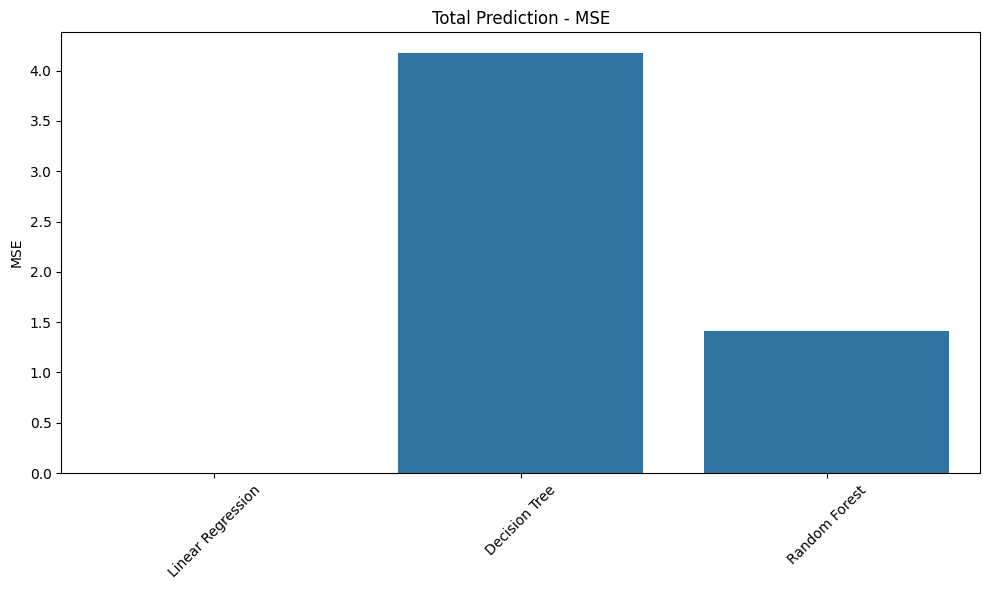

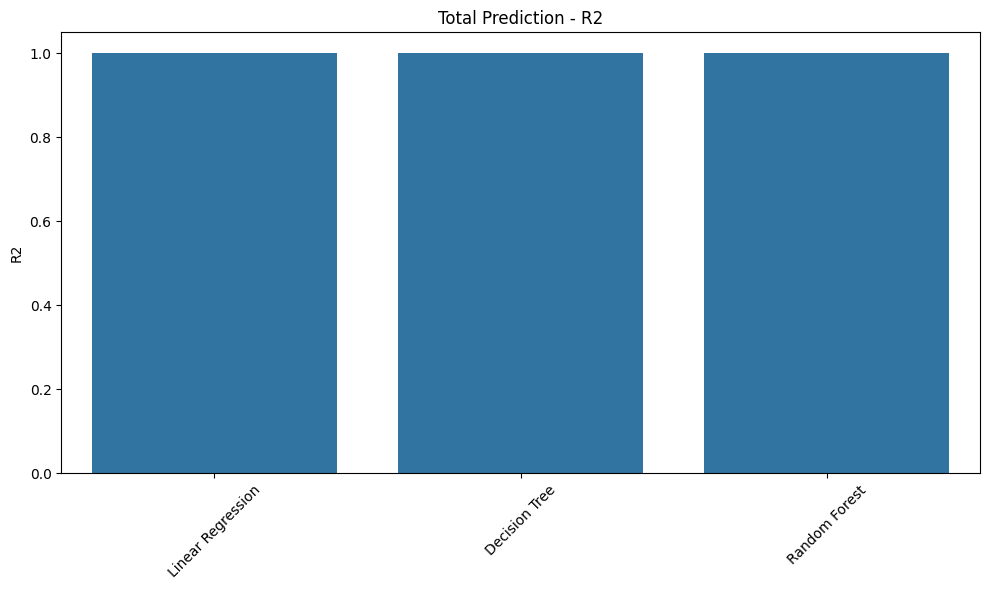

In [86]:
plot_model_comparison([lr_metrics1, dt_metrics1, rf_metrics1], "Total Prediction", "mse")
plot_model_comparison([lr_metrics1, dt_metrics1, rf_metrics1], "Total Prediction", "r2")

# Model 2 Comparisons

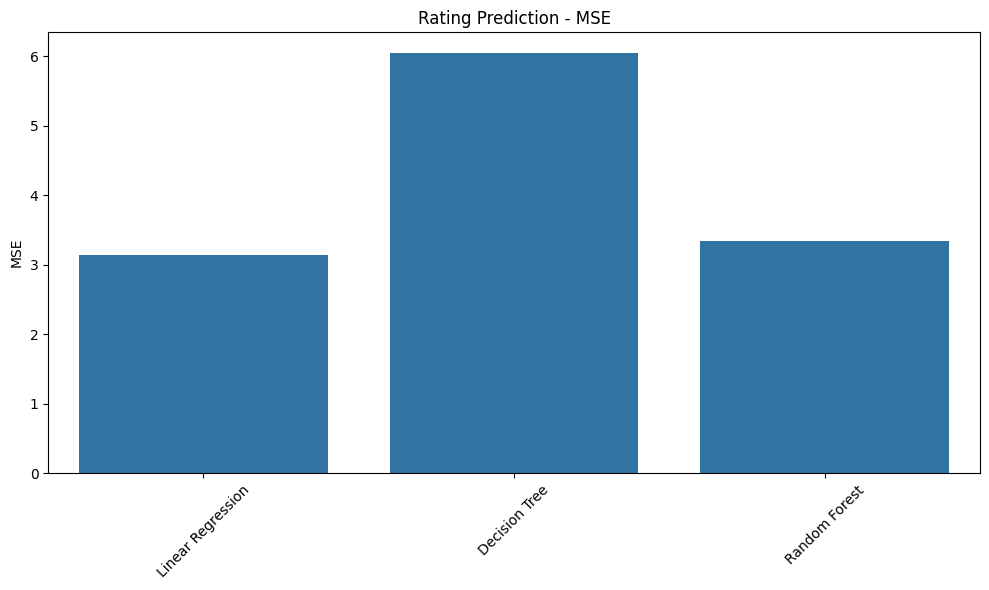

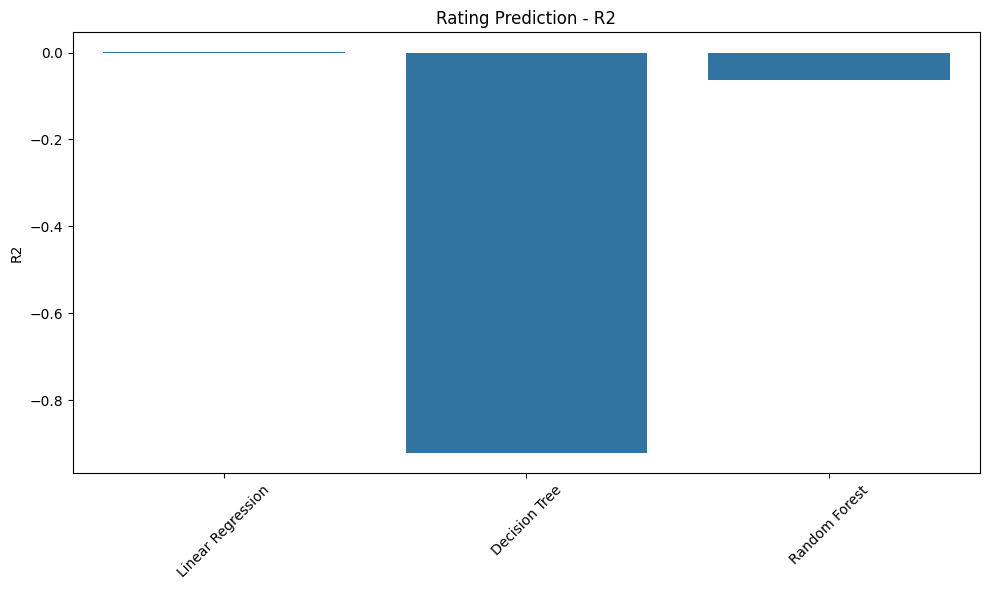

In [87]:
plot_model_comparison([lr_metrics2, dt_metrics2, rf_metrics2], "Rating Prediction", "mse")
plot_model_comparison([lr_metrics2, dt_metrics2, rf_metrics2], "Rating Prediction", "r2")

# Model Comparison and Visualization

## Function to create feature importance plots

In [88]:
def plot_feature_importance(model, X_columns, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        top_n = min(15, len(X_columns))
        
        plt.figure(figsize=(12, 8))
        plt.title(f"Feature Importance: {title}")
        plt.bar(range(top_n), importances[indices][:top_n], align='center')
        plt.xticks(range(top_n), [X_columns[i] for i in indices][:top_n], rotation=90)
        plt.tight_layout()
        plt.show()

## Actual vs Predicted plots for regression models

In [89]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Add perfect prediction line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.title(f"{title} - Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Plot for Model 1 (Total)

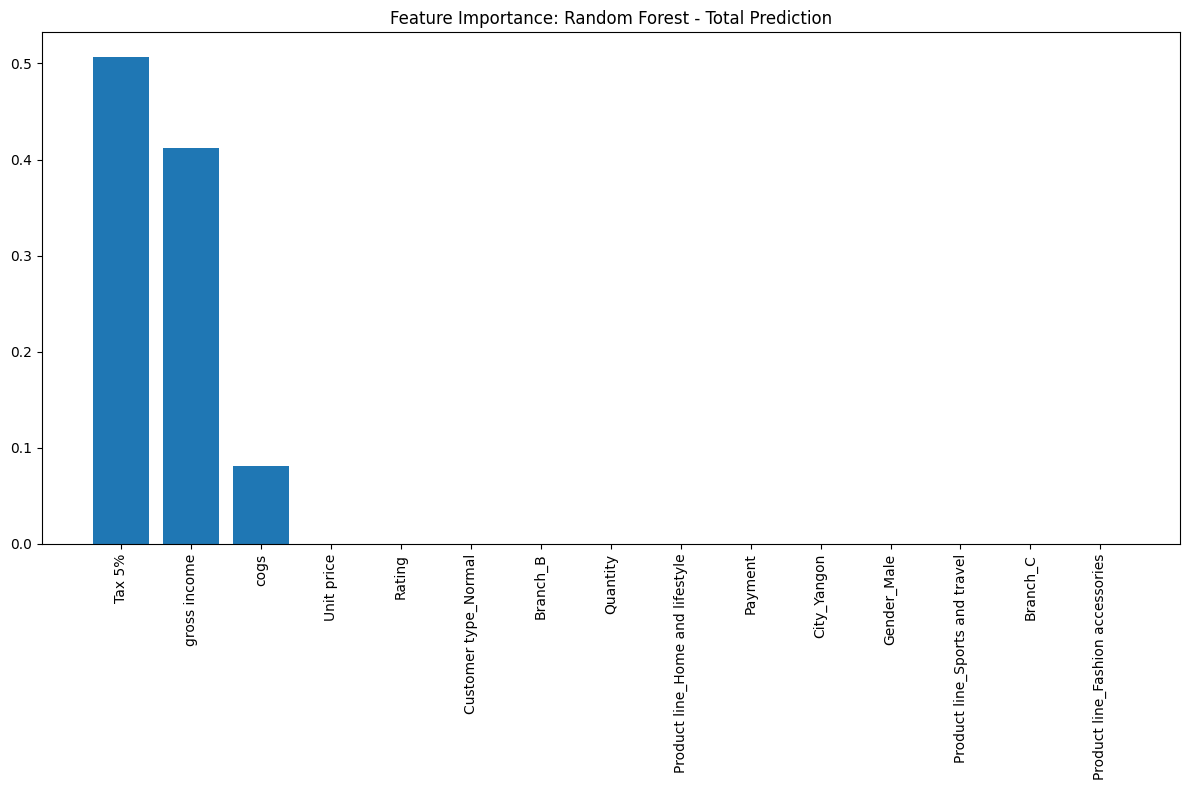

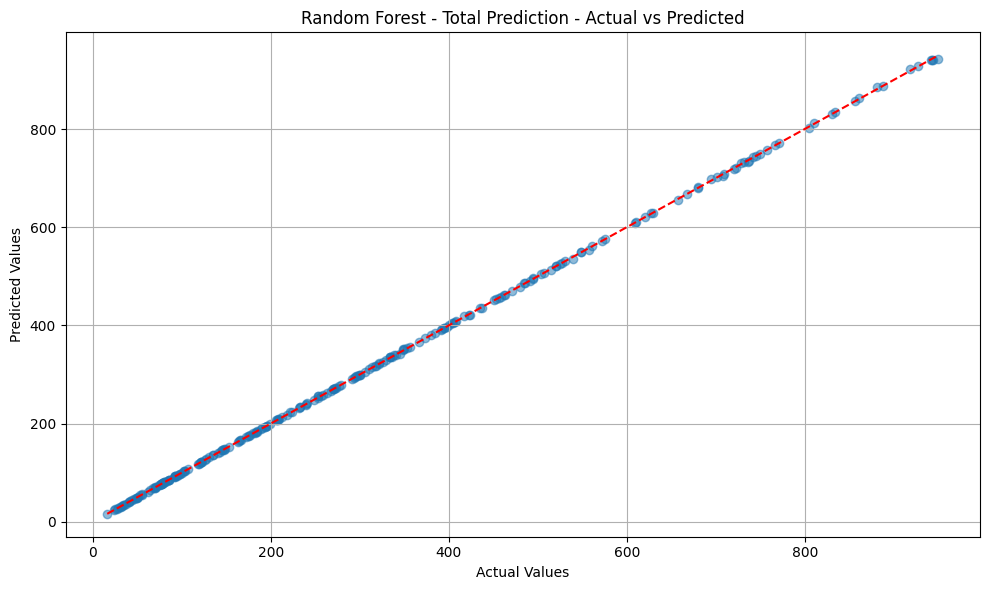

In [90]:
rf_model1 = RandomForestRegressor(**{'max_depth': None, 'min_samples_leaf': 1, 
                               'min_samples_split': 2, 'n_estimators': 100}).fit(X_train1, y_train1)
plot_feature_importance(rf_model1, X_train1.columns, "Random Forest - Total Prediction")
plot_actual_vs_predicted(y_test1, rf_pred1, "Random Forest - Total Prediction")

# Plot for Model 2 (Rating)

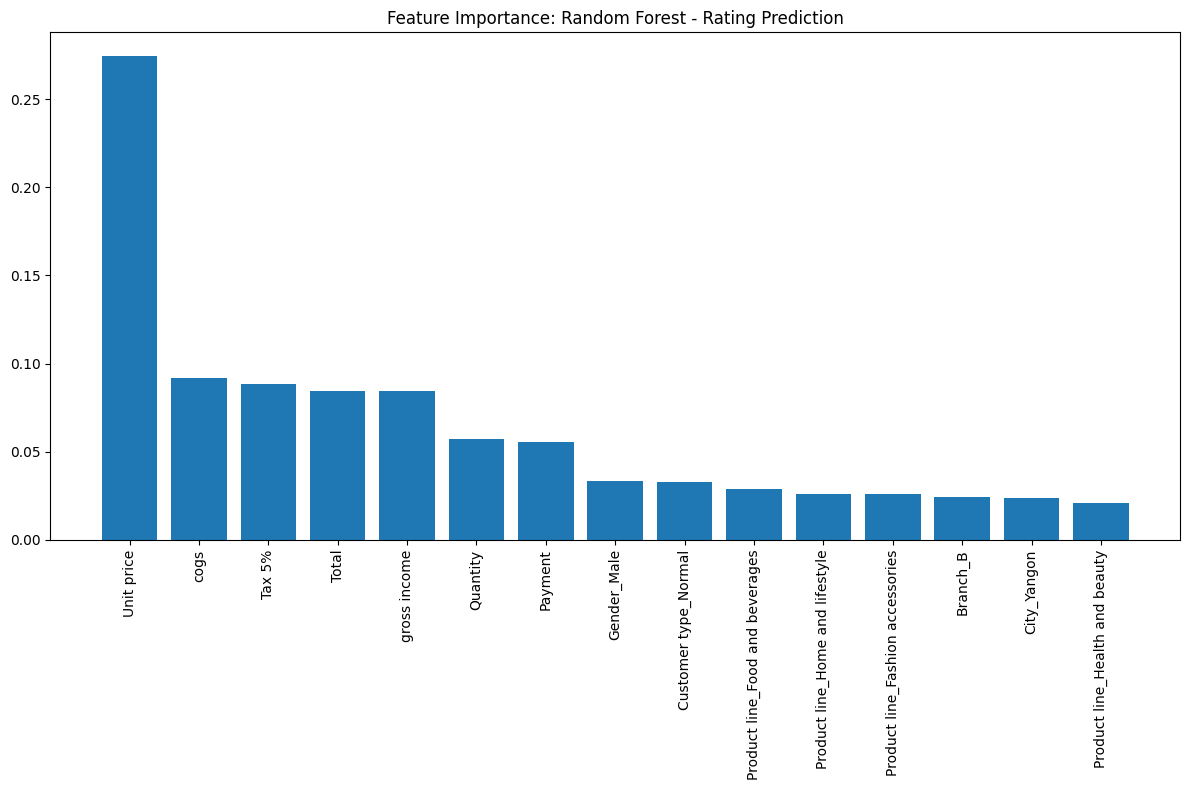

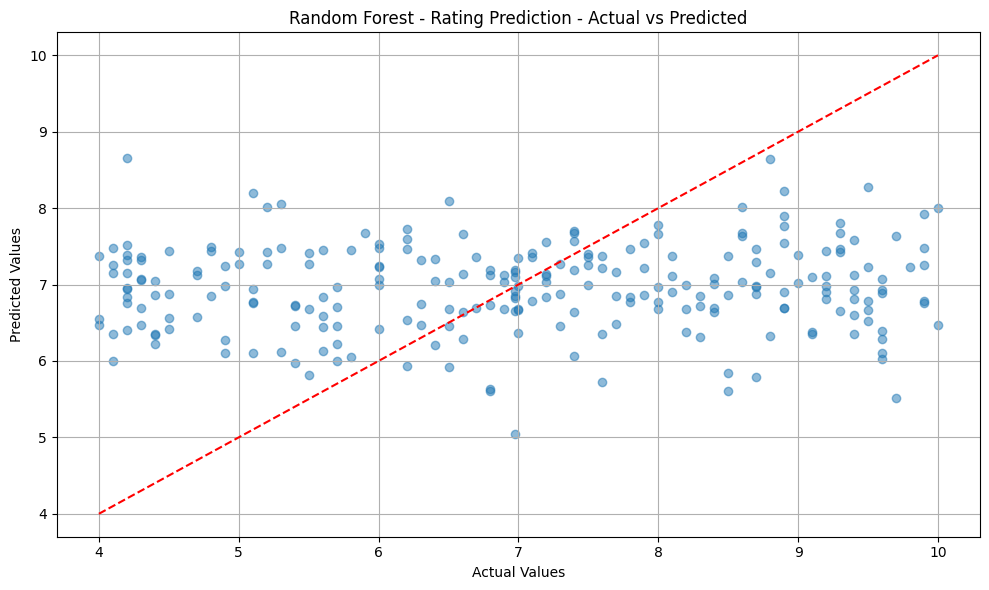

In [91]:
rf_model2 = RandomForestRegressor(**{'max_depth': None, 'min_samples_leaf': 1, 
                               'min_samples_split': 2, 'n_estimators': 100}).fit(X_train2, y_train2)
plot_feature_importance(rf_model2, X_train2.columns, "Random Forest - Rating Prediction")
plot_actual_vs_predicted(y_test2, rf_pred2, "Random Forest - Rating Prediction")

# Plot for Model 3 (Payment)

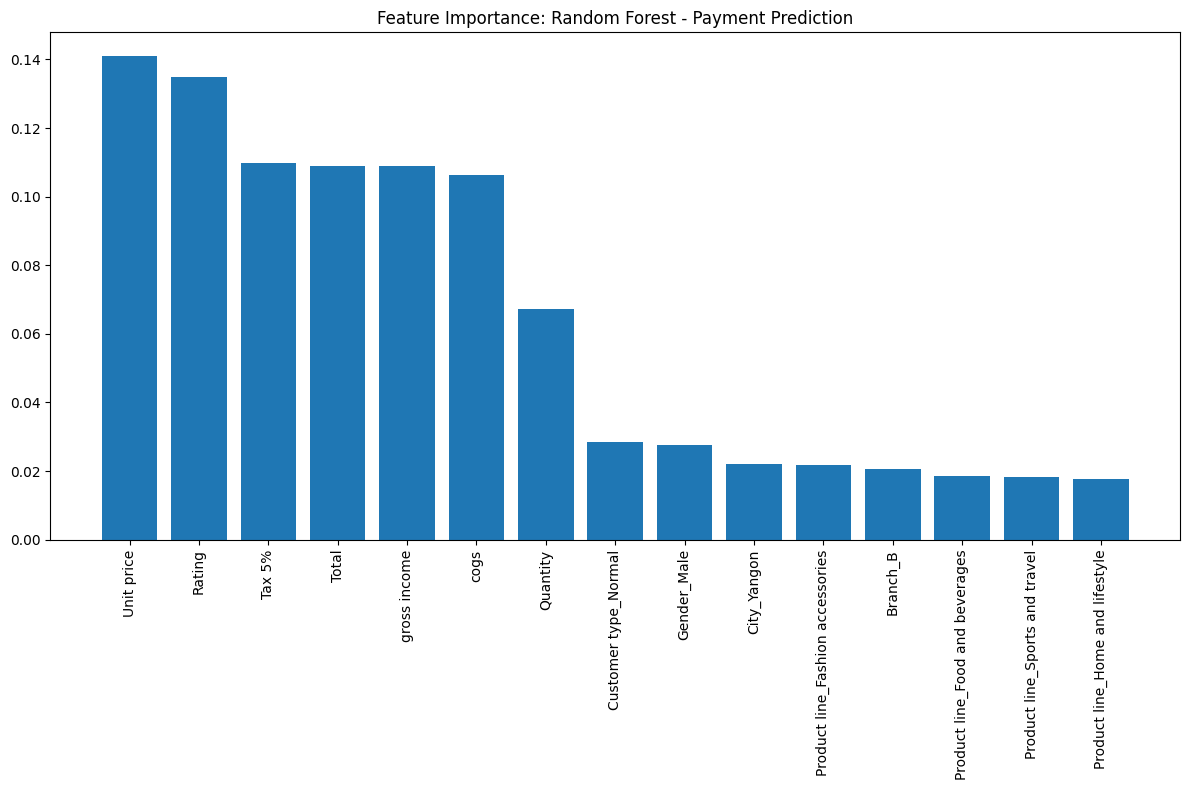

In [92]:
rf_model3 = RandomForestClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 
                               'min_samples_split': 2, 'n_estimators': 100}).fit(X_train3, y_train3)
plot_feature_importance(rf_model3, X_train3.columns, "Random Forest - Payment Prediction")

# Cross-model performance comparison

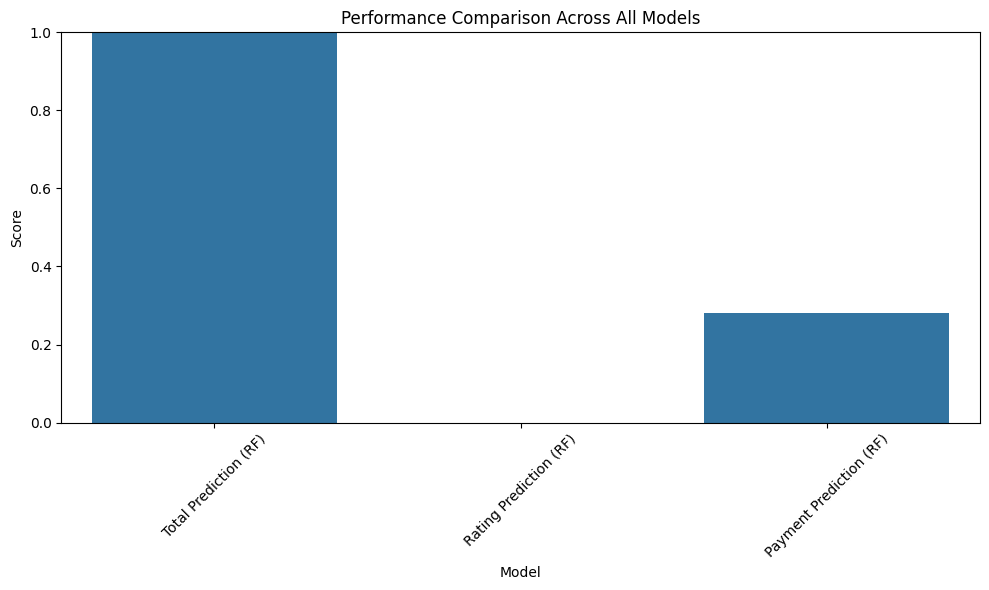

In [93]:
models_summary = pd.DataFrame({
    'Model': ['Total Prediction (RF)', 'Rating Prediction (RF)', 'Payment Prediction (RF)'],
    'Performance Metric': [f"R² = {rf_metrics1['r2']:.4f}", f"R² = {rf_metrics2['r2']:.4f}", f"Accuracy = {accuracy_rf:.4f}"],
    'Score': [rf_metrics1['r2'], rf_metrics2['r2'], accuracy_rf]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=models_summary)
plt.title("Performance Comparison Across All Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Deployment

In [94]:
joblib.dump(grid_search.best_estimator_, 'best_model_total.pkl')  # Replace with actual model variable
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(df_encoded.columns, 'training_columns.pkl')

['training_columns.pkl']

In [95]:
scaler = joblib.load('scaler.pkl')
training_columns = joblib.load('training_columns.pkl')
best_model_total = joblib.load('best_model_total.pkl')

num_scale_cols = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income']
encodeding_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line']


In [96]:
def predict_supermarket_transaction(new_data_dict):
    new_data = pd.DataFrame([new_data_dict])

    cols_to_drop = ['Invoice ID', 'Time', 'Date']
    new_data = new_data.drop([col for col in cols_to_drop if col in new_data.columns], axis=1)

   
    if 'Unit price' in new_data.columns:
        new_data['Unit price'] = np.log(new_data['Unit price'] + 1)

   
    if 'cogs' in new_data.columns and isinstance(new_data['cogs'].iloc[0], str):
        new_data['cogs'] = new_data['cogs'].str.replace('k', '').astype(float) * 1000

   
    categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
    new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)

    
    for col in training_columns:
        if col not in new_data_encoded.columns and col != 'Total':
            new_data_encoded[col] = 0

   
    new_data_encoded = new_data_encoded[training_columns.drop('Total')]

   
    new_data_encoded[num_scale_cols] = scaler.transform(new_data_encoded[num_scale_cols])

    
    total_pred = best_model_total.predict(new_data_encoded)[0]

    return {
        'predicted_total': round(float(total_pred), 2)
    }



































In [98]:
"""
def get_user_input_and_predict():
    
    branch = input("Branch (A, B, C): ")
    city = input("City (Yangon, Naypyitaw, Mandalay): ")
    customer_type = input("Customer type (Member, Normal): ")
    gender = input("Gender (Male, Female): ")
    product_line = input("Product line (e.g., Health and beauty, Electronic accessories, etc.): ")
    
    unit_price = float(input("Unit price (e.g., 74.69): "))
    quantity = int(input("Quantity (e.g., 7): "))
    tax = float(input("Tax 5% (e.g., 18.67): "))
    cogs = input("COGS (e.g., 373.33 or 3.7k): ")
    gross_margin = float(input("Gross margin percentage (e.g., 4.8): "))
    gross_income = float(input("Gross income (e.g., 18.67): "))
    payment = input("Payment method (e.g., Cash, Credit card, Ewallet): ")
    
    user_data = {
        'Branch': branch,
        'City': city,
        'Customer type': customer_type,
        'Gender': gender,
        'Product line': product_line,
        'Unit price': unit_price,
        'Payment': payment,
        'Quantity': quantity,
        'Tax 5%': tax,
        'cogs': cogs,
        'gross margin percentage': gross_margin,
        'gross income': gross_income
    }
    

    result = predict_supermarket_transaction(user_data)
    
    print("\nPrediction Result:")
    print(f"Predicted Total: ${result['predicted_total']}")

get_user_input_and_predict()

"""

'\ndef get_user_input_and_predict():\n    \n    branch = input("Branch (A, B, C): ")\n    city = input("City (Yangon, Naypyitaw, Mandalay): ")\n    customer_type = input("Customer type (Member, Normal): ")\n    gender = input("Gender (Male, Female): ")\n    product_line = input("Product line (e.g., Health and beauty, Electronic accessories, etc.): ")\n    \n    unit_price = float(input("Unit price (e.g., 74.69): "))\n    quantity = int(input("Quantity (e.g., 7): "))\n    tax = float(input("Tax 5% (e.g., 18.67): "))\n    cogs = input("COGS (e.g., 373.33 or 3.7k): ")\n    gross_margin = float(input("Gross margin percentage (e.g., 4.8): "))\n    gross_income = float(input("Gross income (e.g., 18.67): "))\n    payment = input("Payment method (e.g., Cash, Credit card, Ewallet): ")\n    \n    user_data = {\n        \'Branch\': branch,\n        \'City\': city,\n        \'Customer type\': customer_type,\n        \'Gender\': gender,\n        \'Product line\': product_line,\n        \'Unit price

---

# **documentation**

<a href="C:\Users\dell\Desktop\7th project\7 project.pdf" target="_blank">Click here to open report</a>
